# IAU Projekt - Fáza 1 - Prieskumná analýza
Peter Brenkus, Tomáš Brček

Percentuálny podiel: 50/50

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from statsmodels.stats.power import GofChisquarePower

In [2]:
# načítanie súborov
connections = pd.read_csv("raw_data/connections.csv", delimiter="\t")
devices = pd.read_csv("raw_data/devices.csv", delimiter="\t")
processes = pd.read_csv("raw_data/processes.csv", delimiter="\t")
profiles = pd.read_csv("raw_data/profiles.csv", delimiter="\t")

# 1.1 Základný opis dát spolu s ich charakteristikami

## A

Analýza štruktúr dát ako súbory (štruktúry a vzťahy, počet, typy, …), záznamy
(štruktúry, počet záznamov, počet atribútov, typy, …)

### Connections
V tomto súbore sú informácie o sieťových pripojeniach mobilných zariadení.

In [3]:
connections.head()

,ts,imei,mwra,c.dogalize,c.android.gm,c.android.chrome,c.android.youtube,c.katana,c.updateassist,c.UCMobile.x86,c.android.vending,c.raider,c.UCMobile.intl
0,2018-05-05 10:00:00,3590433799317661966,1.0,9.03970,14.35315,13.76020,11.12559,6.73850,66.91554,54.28226,16.75773,4.64834,30.67838
1,2018-05-05 10:01:00,3590433799317661073,1.0,9.41478,7.51650,12.31292,12.55000,7.19936,32.67809,64.59178,29.13667,28.68688,59.46351
2,2018-05-05 10:02:00,359043379931766445,0.0,13.25806,7.23549,10.30754,7.77630,13.17780,55.29738,36.98063,65.83367,73.22975,37.54590
3,2018-05-05 10:03:00,3590433799317662014,0.0,11.41695,8.09047,8.96150,9.97905,11.82898,38.55251,46.93124,58.06052,15.85001,36.53092
4,2018-05-05 10:04:00,3590433799317661651,0.0,12.47250,9.28802,8.48795,8.60786,11.82816,43.46316,43.94921,47.15770,39.61245,38.15171


In [4]:
connections.shape

(15082, 13)

In [5]:
connections.columns

Index(['ts', 'imei', 'mwra', 'c.dogalize', 'c.android.gm', 'c.android.chrome',
       'c.android.youtube', 'c.katana', 'c.updateassist', 'c.UCMobile.x86',
       'c.android.vending', 'c.raider', 'c.UCMobile.intl'],
      dtype='object')

In [6]:
connections.dtypes

ts                    object
imei                   int64
mwra                 float64
c.dogalize           float64
c.android.gm         float64
c.android.chrome     float64
c.android.youtube    float64
c.katana             float64
c.updateassist       float64
c.UCMobile.x86       float64
c.android.vending    float64
c.raider             float64
c.UCMobile.intl      float64
dtype: object

In [7]:
connections.isnull().sum()

ts                   0
imei                 0
mwra                 0
c.dogalize           0
c.android.gm         0
c.android.chrome     0
c.android.youtube    0
c.katana             0
c.updateassist       0
c.UCMobile.x86       0
c.android.vending    0
c.raider             0
c.UCMobile.intl      0
dtype: int64

In [8]:
connections.shape[0] - connections.dropna().shape[0]

0

In [9]:
connections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15082 entries, 0 to 15081
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15082 non-null  object 
 1   imei               15082 non-null  int64  
 2   mwra               15082 non-null  float64
 3   c.dogalize         15082 non-null  float64
 4   c.android.gm       15082 non-null  float64
 5   c.android.chrome   15082 non-null  float64
 6   c.android.youtube  15082 non-null  float64
 7   c.katana           15082 non-null  float64
 8   c.updateassist     15082 non-null  float64
 9   c.UCMobile.x86     15082 non-null  float64
 10  c.android.vending  15082 non-null  float64
 11  c.raider           15082 non-null  float64
 12  c.UCMobile.intl    15082 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


In [10]:
connections['imei'].nunique()

500

### Devices
Tento súbor obsahuje údaje o lokáciach mobilných zariadení. Odtialto by bolo v rámci kontextu zadania zaujímavé zistiť napríklad či v nejakej lokácii alebo regióne nebola zvýšená malvérová aktivita.

In [11]:
devices.head()

,latitude,longitude,store_name,code,location,imei
0,37.73222,115.70111,Hengshui,CN,Asia/Shanghai,359043379931766668
1,36.46917,10.78222,Beni Khiar,TN,Africa/Tunis,3590433799317661669
2,43.61092,3.87723,Montpellier,FR,Europe/Paris,359043379931766767
3,20.88953,-156.47432,Kahului,US,Pacific/Honolulu,359043379931766502
4,42.81900,47.11920,Buynaksk,RU,Europe/Moscow,3590433799317661370


In [12]:
devices.shape

(2903, 6)

In [13]:
devices.columns

Index(['latitude', 'longitude', 'store_name', 'code', 'location', 'imei'], dtype='object')

In [14]:
devices.dtypes

latitude      float64
longitude     float64
store_name     object
code           object
location       object
imei            int64
dtype: object

In [15]:
devices.isnull().sum()

latitude      0
longitude     0
store_name    0
code          4
location      0
imei          0
dtype: int64

In [16]:
devices.shape[0] - devices.dropna().shape[0]

4

In [17]:
devices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2903 non-null   float64
 1   longitude   2903 non-null   float64
 2   store_name  2903 non-null   object 
 3   code        2899 non-null   object 
 4   location    2903 non-null   object 
 5   imei        2903 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 136.2+ KB


In [18]:
devices['imei'].nunique()

499

### Processes
Tento súbor vyzerá že obsahuje informácie o procesoch bežacich na danom zariadení v danom čase.

Nachádzajú sa tu však aj stĺpce s rovnakými menami ako v súbore connections, a to p.android.gm, p.android.chrome, p.android.vending, p.dogalize a p.katana, toto možno budú redundantné dáta.

In [19]:
processes.head()

,ts,imei,mwra,p.android.gm,p.android.externalstorage,p.android.documentsui,p.system,p.android.settings,p.android.packageinstaller,p.android.chrome,...,p.dogalize,p.inputmethod.latin,p.simulator,p.android.gms,p.android.vending,p.katana,p.process.gapps,p.google,p.olauncher,p.browser.provider
0,2018-05-05 10:00:00,3590433799317661966,1.0,13.08147,6.26446,7.97092,11.24427,11.08966,8.23662,11.58103,...,42.19751,79.40836,45.40991,87.15437,51.41012,69.25298,20.06545,13.62688,21.52231,84.08213
1,2018-05-05 10:01:00,3590433799317661073,1.0,9.52577,13.15723,10.12613,14.37023,14.36103,5.40400,7.72424,...,53.72498,39.27139,13.21933,74.91757,30.24281,53.84815,21.26466,7.85091,1.76933,40.47904
2,2018-05-05 10:02:00,359043379931766445,0.0,11.23775,13.43689,12.58645,7.63430,12.54228,12.04773,7.86555,...,43.77214,36.49072,86.97079,96.17420,7.71312,78.90782,8.32312,41.12966,75.38385,68.61776
3,2018-05-05 10:03:00,3590433799317662014,0.0,6.02527,11.05170,12.42098,16.98137,11.35344,11.37062,10.67391,...,55.74452,48.78629,9.34253,63.25140,61.82840,43.90015,83.45260,61.63458,13.99080,62.90951
4,2018-05-05 10:04:00,3590433799317661651,0.0,4.97925,11.86770,10.20366,15.33645,11.64182,12.93403,10.25430,...,17.59833,49.69782,7.07021,73.27845,46.34725,91.91502,19.71363,12.49803,80.71499,3.93994


In [20]:
processes.shape

(15082, 23)

In [21]:
processes.columns

Index(['ts', 'imei', 'mwra', 'p.android.gm', 'p.android.externalstorage',
       'p.android.documentsui', 'p.system', 'p.android.settings',
       'p.android.packageinstaller', 'p.android.chrome',
       'p.android.defcontainer', 'p.gms.persistent', 'p.notifier',
       'p.dogalize', 'p.inputmethod.latin', 'p.simulator', 'p.android.gms',
       'p.android.vending', 'p.katana', 'p.process.gapps', 'p.google',
       'p.olauncher', 'p.browser.provider'],
      dtype='object')

In [22]:
processes.dtypes

ts                             object
imei                            int64
mwra                          float64
p.android.gm                  float64
p.android.externalstorage     float64
p.android.documentsui         float64
p.system                      float64
p.android.settings            float64
p.android.packageinstaller    float64
p.android.chrome              float64
p.android.defcontainer        float64
p.gms.persistent              float64
p.notifier                    float64
p.dogalize                    float64
p.inputmethod.latin           float64
p.simulator                   float64
p.android.gms                 float64
p.android.vending             float64
p.katana                      float64
p.process.gapps               float64
p.google                      float64
p.olauncher                   float64
p.browser.provider            float64
dtype: object

In [23]:
processes.isnull().sum()

ts                            0
imei                          0
mwra                          0
p.android.gm                  0
p.android.externalstorage     0
p.android.documentsui         0
p.system                      0
p.android.settings            0
p.android.packageinstaller    0
p.android.chrome              0
p.android.defcontainer        0
p.gms.persistent              0
p.notifier                    0
p.dogalize                    0
p.inputmethod.latin           0
p.simulator                   0
p.android.gms                 0
p.android.vending             0
p.katana                      0
p.process.gapps               0
p.google                      0
p.olauncher                   0
p.browser.provider            0
dtype: int64

In [24]:
processes.shape[0] - processes.dropna().shape[0]

0

In [25]:
processes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15082 entries, 0 to 15081
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15082 non-null  object 
 1   imei                        15082 non-null  int64  
 2   mwra                        15082 non-null  float64
 3   p.android.gm                15082 non-null  float64
 4   p.android.externalstorage   15082 non-null  float64
 5   p.android.documentsui       15082 non-null  float64
 6   p.system                    15082 non-null  float64
 7   p.android.settings          15082 non-null  float64
 8   p.android.packageinstaller  15082 non-null  float64
 9   p.android.chrome            15082 non-null  float64
 10  p.android.defcontainer      15082 non-null  float64
 11  p.gms.persistent            15082 non-null  float64
 12  p.notifier                  15082 non-null  float64
 13  p.dogalize                  150

In [26]:
processes['imei'].nunique()

500

### Profiles
Tento súbor obsahuje informácie o pužívateľoch mobilných zariadení, vrátane spoločností pre ktoré asi pracujú. Tu by mohlo byť zaujímavé zistiť či nebol malvérový útok na nejakú firmu, prípadne aj firma samotná mohla naištalovať špehovací malvér na zariadenia svojich zamestnancov. 

Môžme tu však vidieť početné nulové hodnoty v stĺpcoch birthdate, job a residence. Tieto sĺpce majú tk veľa nulových hodnôt že zostávajúce hodnoty nám asi veľa nepovedia.

In [27]:
profiles.head()

,birthdate,user_id,registration,company,job,mail,residence,imei,current_location,username,ssn,name
0,NaN,847,2019/11/21,Mitchell-Solis,NaN,timothytaylor@yahoo.com,NaN,8630330696303481933,"(Decimal('-20.2706735'), Decimal('157.457919'))",aaron53,616-47-8424,Michael Wilson
1,NaN,1161,2022-11-08,"Gonzales, Ingram and Sanchez",Geophysical data processor,gonzalezmichael@gmail.com,NaN,8630330696303481099,"(Decimal('-53.811515'), Decimal('24.770391'))",nicole50,537-31-1859,James Long
2,1940-10-02,1255,"06/04/2018, 00:00:00",Rowland LLC,NaN,sarahgreene@yahoo.com,NaN,3590433799317661909,"(Decimal('79.3383185'), Decimal('19.887697'))",amber66,427-45-3074,Keith Donovan
3,NaN,2069,2021-01-19,Pearson PLC,NaN,destinyholland@gmail.com,NaN,3590433799317661008,"(Decimal('-39.788237'), Decimal('115.687134'))",dana32,286-31-2534,Stephanie Bell
4,NaN,1648,21 Jan 2022,English LLC,NaN,thomas78@hotmail.com,"71251 Conway Divide Suite 608\nNorth Zachary, ...",359043379931766775,"(Decimal('16.925840'), Decimal('-82.703519'))",cbutler,252-18-1389,Randy Rodriguez


In [28]:
profiles.shape

(2597, 12)

In [29]:
profiles.columns

Index(['birthdate', 'user_id', 'registration', 'company', 'job', 'mail',
       'residence', 'imei', 'current_location', 'username', 'ssn', 'name'],
      dtype='object')

In [30]:
profiles.dtypes

birthdate           object
user_id              int64
registration        object
company             object
job                 object
mail                object
residence           object
imei                 int64
current_location    object
username            object
ssn                 object
name                object
dtype: object

In [31]:
profiles.isnull().sum()

birthdate           1169
user_id                0
registration           0
company                0
job                 1818
mail                   0
residence           1688
imei                   0
current_location     130
username               0
ssn                    0
name                   0
dtype: int64

In [32]:
profiles.shape[0] - profiles.dropna().shape[0]

2463

In [33]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   birthdate         1428 non-null   object
 1   user_id           2597 non-null   int64 
 2   registration      2597 non-null   object
 3   company           2597 non-null   object
 4   job               779 non-null    object
 5   mail              2597 non-null   object
 6   residence         909 non-null    object
 7   imei              2597 non-null   int64 
 8   current_location  2467 non-null   object
 9   username          2597 non-null   object
 10  ssn               2597 non-null   object
 11  name              2597 non-null   object
dtypes: int64(2), object(10)
memory usage: 243.6+ KB


In [34]:
profiles['imei'].nunique()

496

### Zhrnutie
V súboroch connections a processes sa nachádzajú relevantné informácie, ktoré nám môžu poskytnúť náhľad do malvérových aktivít, ktoré máme skúmať. V súboroch devices a profiles je veľa nulových hodnôt a nezhodujúcich sa formátov, ktoré nám bránia v mergovaní týchto súborov dokopy s ostatnými.

Vo všetkých súboroch sa nachádza stĺpec s názvom imei a približne 500 unikátnymi hodntoami, ktorý vyzerá, že znamená niečo ako ID mobilného zariadenia a bude sa podľa neho dať spájať dáta z rôznych súborov.

## B
Analýza jednotlivých atribútov: pre zvolené významné atribúty (min 10) analyzujte
ich distribúcie a základné deskriptívne štatistiky.

### Výber relevantných stĺpcov

Rozhodli sme sa bližšie analyzovať tieto stĺpce:

- **Connections:**
"c.katana", "c.android.gm", "c.android.youtube", "c.android.chrome", "c.dogalize"

- **Devices:**
"store_name", "code", "location"

- **Profiles:**
"company"
  
- **Processes:**
"p.android.gm", "p.android.externalstorage", "p.android.documentsui", "p.system", "p.android.settings", "p.android.packageinstaller", "p.android.chrome"

Keďže súbory devices a profiles nemôžme mergovať dokopy s ostatnými, budeme ich stĺpce analyzovať samostatne.

In [35]:
columns_to_drop = ["c.android.vending", "c.raider", "c.UCMobile.intl", "c.updateassist", "c.UCMobile.x86"]
relevant_connections = connections.drop(columns=columns_to_drop)
columns_to_drop = ["imei", "latitude", "longitude"]
relevant_devices = devices.drop(columns=columns_to_drop)
columns_to_drop = ["p.inputmethod.latin", "p.simulator", "p.android.gms", "p.android.vending", "p.katana", "p.process.gapps", "p.google", "p.olauncher", "p.browser.provider", "p.android.defcontainer", "p.gms.persistent", "p.notifier", "p.dogalize"]
relevant_processes = processes.drop(columns=columns_to_drop)
columns_to_drop = ["imei", "birthdate", "user_id", "registration", "job", "mail", "residence", "current_location", "username", "ssn", "name"]
relevant_profiles = profiles.drop(columns=columns_to_drop)

### Kategorické stĺpce - devices a profiles

#### Štatistické hodnoty 

In [36]:
relevant_devices.describe(exclude=np.number)

,store_name,code,location
count,2903,2899,2903
unique,917,133,183
top,Hudiksvall,US,America/New_York
freq,9,469,206


In [37]:
relevant_profiles.describe(exclude=np.number)

,company
count,2597
unique,2460
top,Smith Inc
freq,5


In [38]:
for ds in [relevant_devices, relevant_profiles]:
    for col in ds.select_dtypes(exclude=['number']):
        print(ds[col].value_counts())
        print("\n")

store_name
Hudiksvall          9
Moga                9
Evergreen Park      8
Kent                8
Culemborg           8
                   ..
Olanchito           1
Sunnyside           1
Somma Vesuviana     1
Naushahra Virkan    1
Nidderau            1
Name: count, Length: 917, dtype: int64


code
US    469
IN    203
RU    155
DE    150
BR    120
     ... 
XK      1
PG      1
DO      1
RW      1
HN      1
Name: count, Length: 133, dtype: int64


location
America/New_York             206
Asia/Kolkata                 203
Europe/Berlin                150
America/Chicago              138
Europe/London                106
                            ... 
Atlantic/Azores                1
Europe/Samara                  1
Africa/Kigali                  1
America/Argentina/Ushuaia      1
America/Tegucigalpa            1
Name: count, Length: 183, dtype: int64


company
Smith Inc             5
Wilson PLC            5
Wilson Ltd            4
Johnson Inc           4
Smith LLC             4
         

#### Vizualizácia

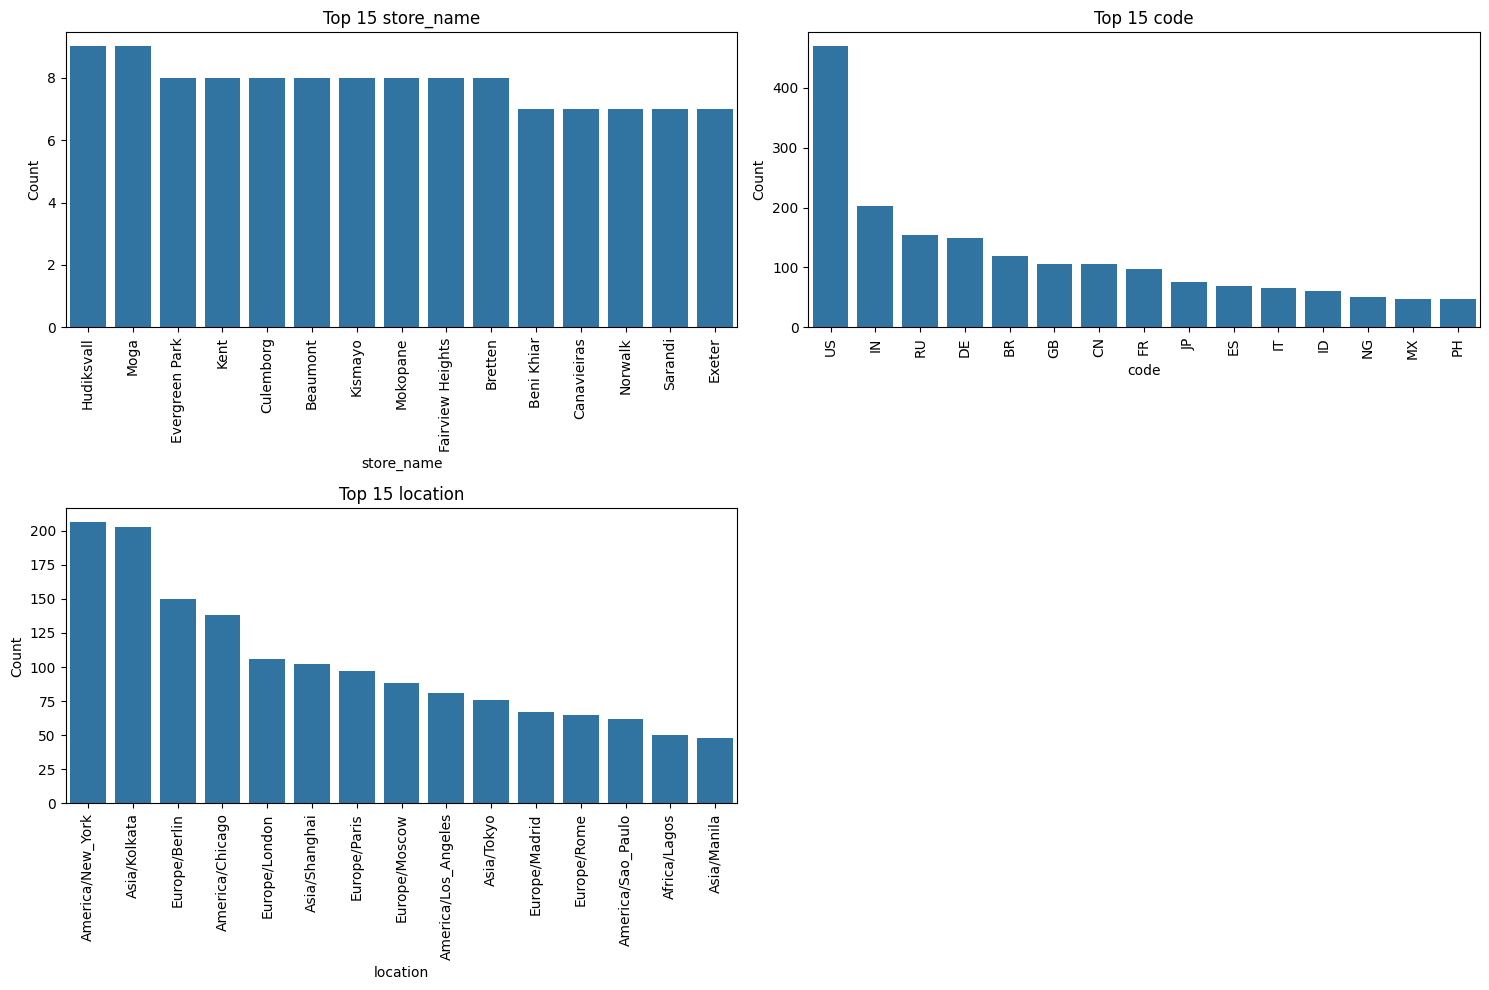

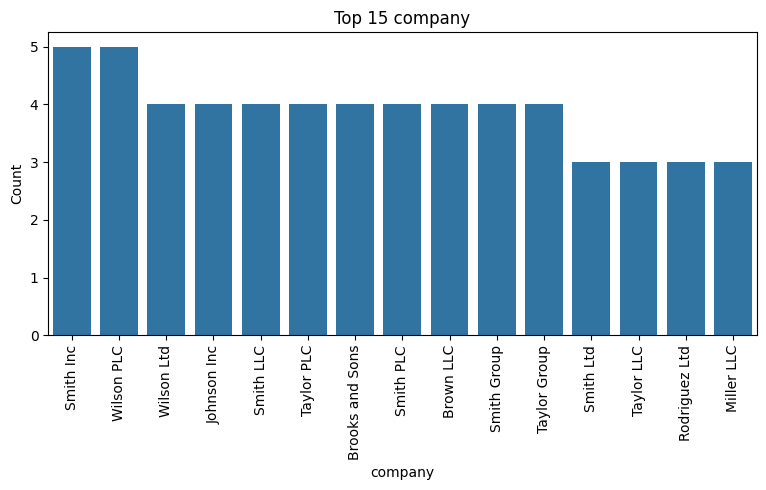

In [39]:
num_cols = 2

for ds in [relevant_devices, relevant_profiles]:
    categorical_cols = ds.select_dtypes(exclude=['number']).columns
    num_plots = len(categorical_cols)

    num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

    if num_rows == 0:
        continue

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        sns.countplot(x=col, data=ds, order=ds[col].value_counts().index[:15], ax=axes[i])
        axes[i].set_title(f'Top 15 {col}')
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel(col)
        axes[i].tick_params(axis='x', rotation=90)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

#### Zhrnutie
Zo štatistík a grafov vidíme, že:
- Najviac zastúpený štát je USA
- Najviac zastúpené regióny sú America/New york a Asia/Kolkata

### Numerické stĺpce

#### Základný opis atribútov

In [40]:
relevant_connections.drop(columns=["mwra", "imei"]).describe()

,c.dogalize,c.android.gm,c.android.chrome,c.android.youtube,c.katana
count,15082.000000,15082.000000,15082.000000,15082.000000,15082.000000
mean,12.780511,10.307836,11.493811,10.332468,10.397852
std,2.108549,2.741483,2.633958,2.565897,2.504601
min,3.052220,0.000000,0.540450,2.671060,2.253590
25%,11.387840,8.331292,9.633782,8.510405,8.600627
50%,12.795875,10.257040,11.606770,10.069430,10.232250
75%,14.185975,12.285103,13.360772,12.027000,12.157758
max,21.448640,20.873920,21.980650,20.558500,21.827390


In [41]:
relevant_processes.drop(columns=["mwra", "imei"]).describe()

,p.android.gm,p.android.externalstorage,p.android.documentsui,p.system,p.android.settings,p.android.packageinstaller,p.android.chrome
count,15082.000000,15082.000000,15082.000000,15082.000000,15082.000000,15082.000000,15082.000000
mean,10.959136,11.570061,11.565837,12.148415,10.981909,10.408449,9.791383
std,2.610045,2.575290,2.506415,2.435983,2.628237,2.623675,2.529759
min,2.180730,1.398780,1.030980,2.780780,1.681710,0.430540,0.745730
25%,9.015752,9.828610,9.953453,10.568665,9.065975,8.537558,8.081835
50%,10.975265,11.799585,11.835710,12.282485,11.031075,10.389345,9.636155
75%,12.869393,13.427475,13.342425,13.879573,12.928720,12.322907,11.380020
max,20.395280,20.235780,19.323180,20.565560,18.888400,19.930570,20.294680


#### Štatistické hodnoty

##### Mean, Median & Mode
- Na tieto štatistiky použijeme zabudované funkcie z knižníc

In [42]:
for ds in [relevant_connections.drop(columns=["mwra", "imei"]), relevant_processes.drop(columns=["mwra", "imei"])]:
    for col in ds.select_dtypes(include=['number']):
        mean_value = round(np.mean(ds[col]), 3)
        median_value = round(np.median(ds[col]), 3)
        mode_result = stats.mode(ds[col])
        try:
            mode_value = mode_result.mode
        except IndexError: 
            mode_value = None
        mode_display = mode_value if mode_value is not None else "N/A"
        print(f"{col:30} -> Mean: {mean_value:>8}, Median: {median_value:>8}, Mode: {mode_display:>8}")


c.dogalize                     -> Mean:   12.781, Median:   12.796, Mode: 10.14669
c.android.gm                   -> Mean:   10.308, Median:   10.257, Mode:  6.32849
c.android.chrome               -> Mean:   11.494, Median:   11.607, Mode: 10.82189
c.android.youtube              -> Mean:   10.332, Median:   10.069, Mode: 10.48354
c.katana                       -> Mean:   10.398, Median:   10.232, Mode:  6.78951
p.android.gm                   -> Mean:   10.959, Median:   10.975, Mode:  4.70803
p.android.externalstorage      -> Mean:    11.57, Median:     11.8, Mode:  8.37652
p.android.documentsui          -> Mean:   11.566, Median:   11.836, Mode: 11.52538
p.system                       -> Mean:   12.148, Median:   12.282, Mode:  7.89759
p.android.settings             -> Mean:   10.982, Median:   11.031, Mode: 10.22028
p.android.packageinstaller     -> Mean:   10.408, Median:   10.389, Mode:  7.94377
p.android.chrome               -> Mean:    9.791, Median:    9.636, Mode:  4.96029


##### Skewness & Kurtosis
- Najprv si definujeme funkcie na automatické vyhodnotenie skewness a kurtosis
- Potom pre každý zo zvolených numerických atribútov vypíšeme skewness a kurtosis aj s interpretáciou

In [43]:
# Funkcia pre automaticke vyhodnotenie skewness
def evaluate_skewness(skewness: float) -> str:
    if -0.5 <= skewness <= 0.5:
        return f"Slightly skewed to the {'left' if skewness > 0 else 'right'}"
    elif -1 < skewness < -0.5 or 0.5 < skewness < 1:
        return f"Moderately skewed to the {'left' if skewness > 0 else 'right'}"
    elif skewness <= -1 or skewness >= 1:
        return f"Highly skewed to the {'left' if skewness > 0 else 'right'}"
    else:
        return "Invalid value."

# Funkcia pre automaticke vyhodnotenie kurtosis
def evaluate_kurtosis(kurtosis: float) -> str:
    if kurtosis > 3:
        return "Kurtosis is high."
    elif kurtosis < 3:
        return "Kurtosis is low."
        
# Loop pre vypočítanie, interpretáciu a vypísanie hodnôt
for ds in [relevant_connections.drop(columns=["mwra", "imei"]), relevant_processes.drop(columns=["mwra", "imei"])]:
    for col in ds.select_dtypes(include=['number']):
        skewness_value = round(stats.skew(ds[col]), 3)
        kurtosis_value = round(stats.kurtosis(ds[col]), 3)
        skewness_eval = evaluate_skewness(skewness_value)
        kurtosis_eval = evaluate_kurtosis(kurtosis_value)
        
        print(f"{col:27} Skewness: {skewness_value:>8} -> {skewness_eval:<30} Kurtosis: {kurtosis_value:>8} -> {kurtosis_eval}")


c.dogalize                  Skewness:   -0.027 -> Slightly skewed to the right   Kurtosis:    0.203 -> Kurtosis is low.
c.android.gm                Skewness:    0.008 -> Slightly skewed to the left    Kurtosis:    -0.33 -> Kurtosis is low.
c.android.chrome            Skewness:   -0.119 -> Slightly skewed to the right   Kurtosis:   -0.238 -> Kurtosis is low.
c.android.youtube           Skewness:    0.357 -> Slightly skewed to the left    Kurtosis:   -0.125 -> Kurtosis is low.
c.katana                    Skewness:    0.195 -> Slightly skewed to the left    Kurtosis:   -0.254 -> Kurtosis is low.
p.android.gm                Skewness:   -0.009 -> Slightly skewed to the right   Kurtosis:   -0.435 -> Kurtosis is low.
p.android.externalstorage   Skewness:   -0.262 -> Slightly skewed to the right   Kurtosis:   -0.253 -> Kurtosis is low.
p.android.documentsui       Skewness:   -0.397 -> Slightly skewed to the right   Kurtosis:   -0.097 -> Kurtosis is low.
p.system                    Skewness:   

#### Vizualizácia

##### Histogramy

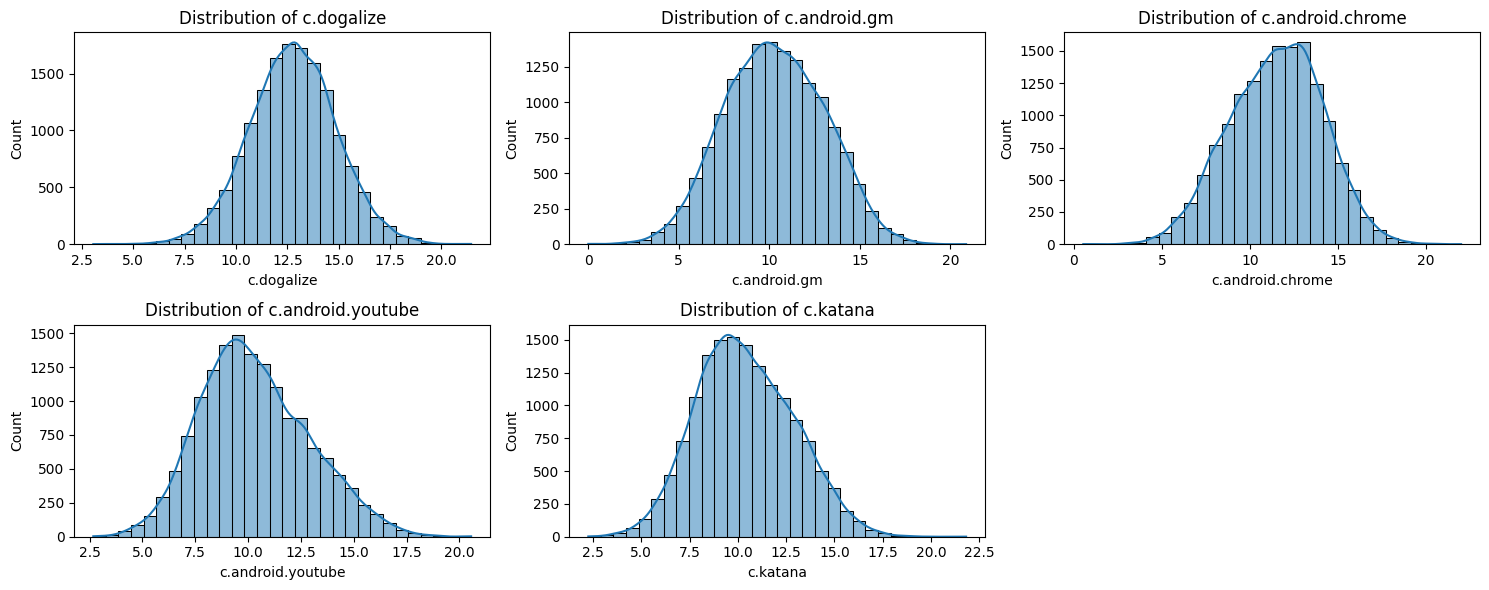

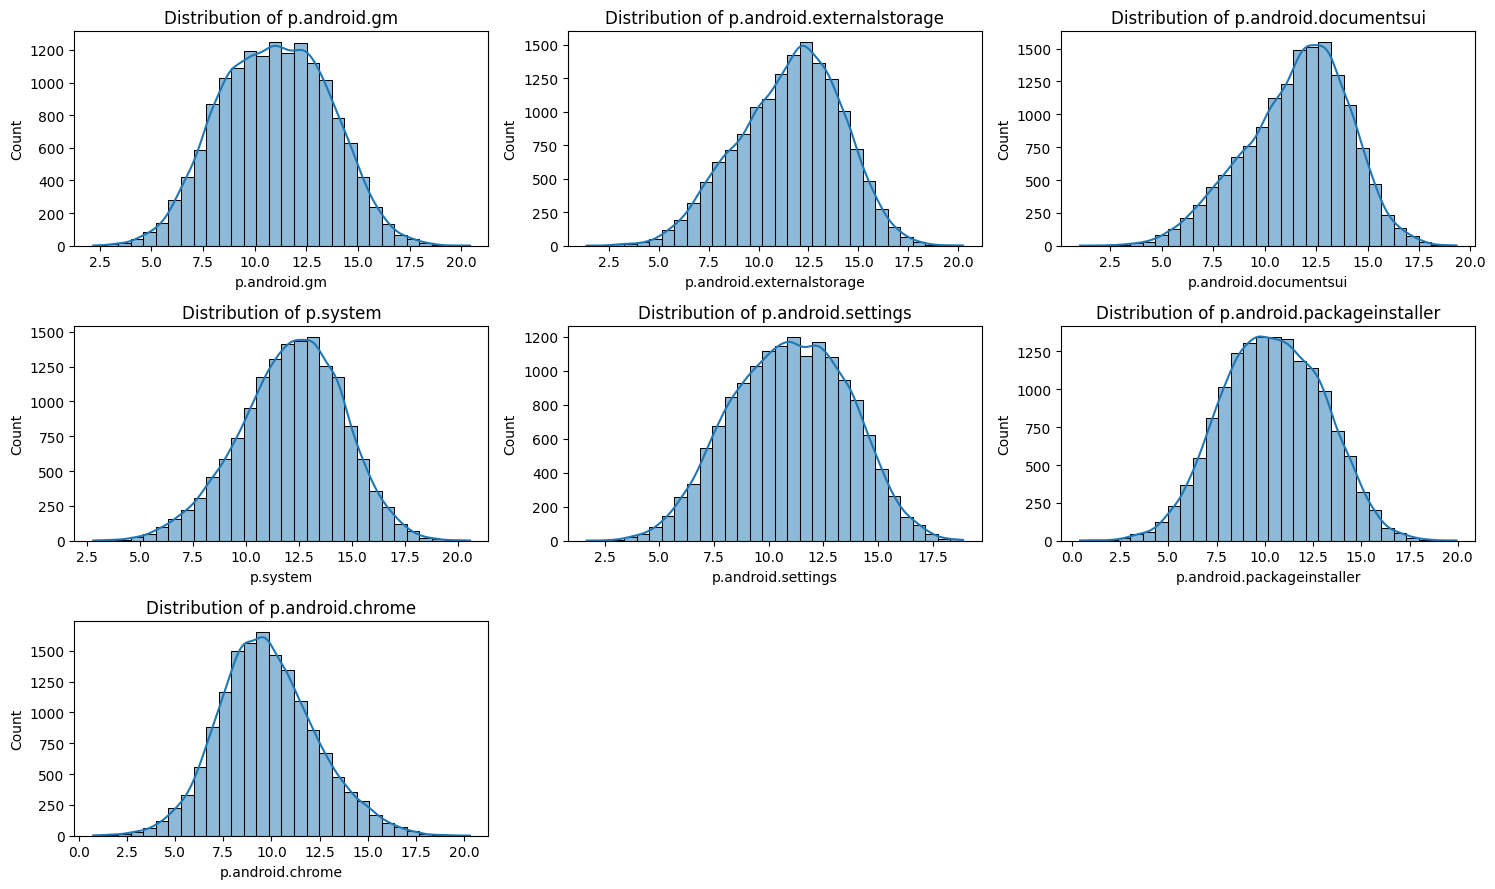

In [44]:
num_cols = 3
for ds in [relevant_connections.drop(columns=["mwra", "imei"]), relevant_processes.drop(columns=["mwra", "imei"])]:
    numeric_cols = ds.select_dtypes(include=['number']).columns
    num_plots = len(numeric_cols)
    
    num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)
    
    if num_rows == 0:
        continue
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 3))

    if num_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        sns.histplot(ds[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_ylabel('Count')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

##### Boxploty

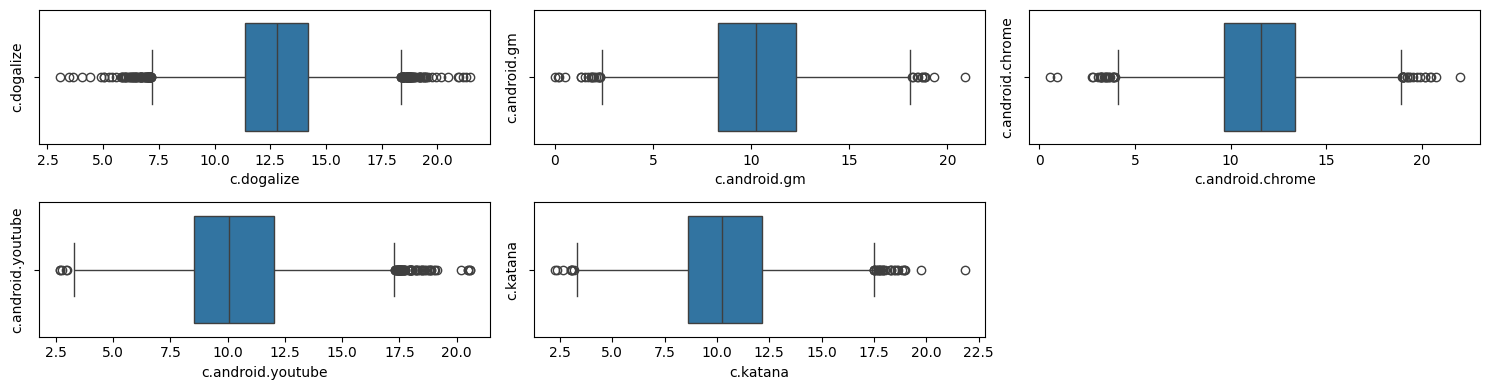

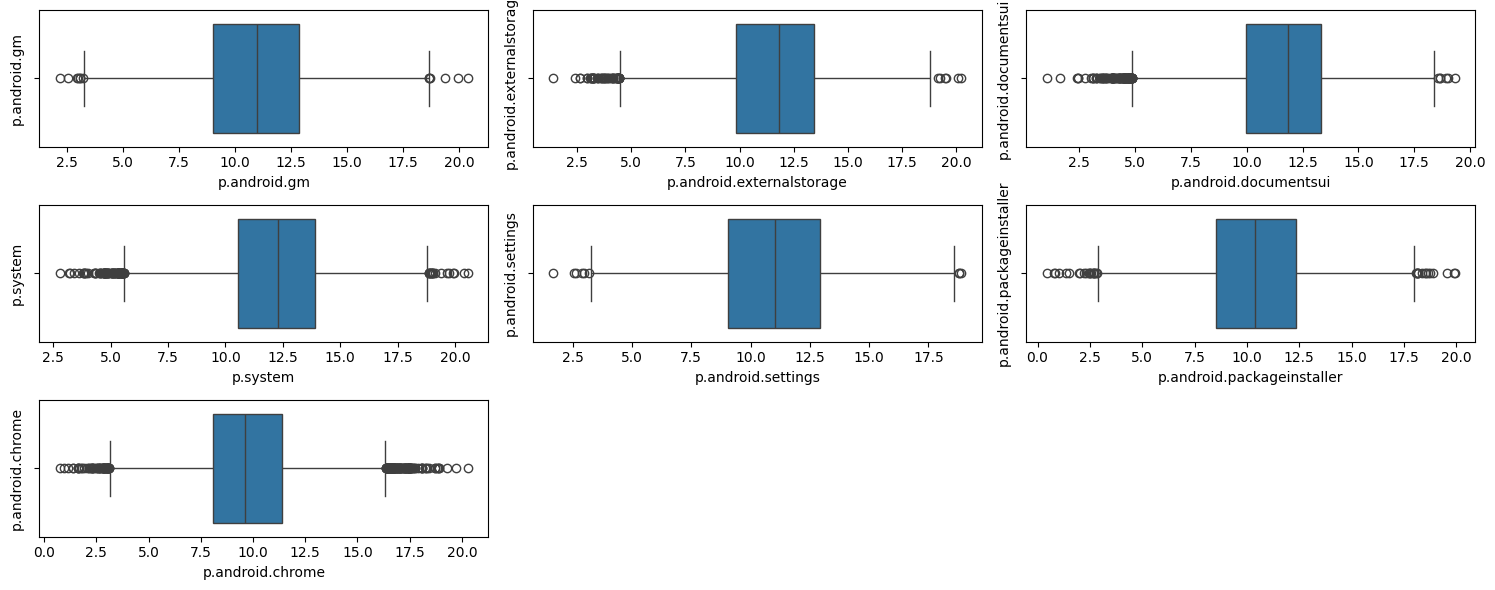

In [45]:
for ds in [relevant_connections.drop(columns=["mwra", "imei"]), relevant_processes.drop(columns=["mwra", "imei"])]:
    numeric_cols = ds.select_dtypes(include=['number']).columns
    num_plots = len(numeric_cols)

    num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

    if num_rows == 0:
        continue

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 2))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=col, data=ds, ax=axes[i])
        axes[i].set_ylabel(col)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

### Zhrnutie
Zo štatistík a grafov daných numerických premenných, nám vyplýva, že:
- zvolené premenné majú podobnú distribúciu podobnú gaussovej
- ich priemer, stredná hodnota a najčastejšia hodnota sú blízko pri sebe
- ich skewness je poväčšine malá, najvyššia hodnota je 0.397
- ich kurtosis je negatívna oproti gaussovej distribúcii
- na boxplotoch vidíme početný výskyt outlierov v každej premennej

## C
Párová analýza dát: Identifikujte vzťahy a závislostí medzi dvojicami atribútov.

Pre účely párovej analýzy sme sa pokúsili spojiť aspoň datasety processes a connections cez polia "imei" a "ts", aby sme mohli analyzovať párový vplyv premenných medzi súbormi.

In [46]:
pair_df = pd.merge(relevant_connections, relevant_processes, on=['ts', 'imei'], how='left')
print(pair_df.shape[0] - connections.shape[0]) 

358


Ako môžme ale vidieť, spojením datasetov nám pribudlo 358 riadkov, čo by ovplyvnilo našu analýzu, preto budeme pokračovať v analýze bez spojenia súborov.

### Párová analýza: connections

<Axes: >

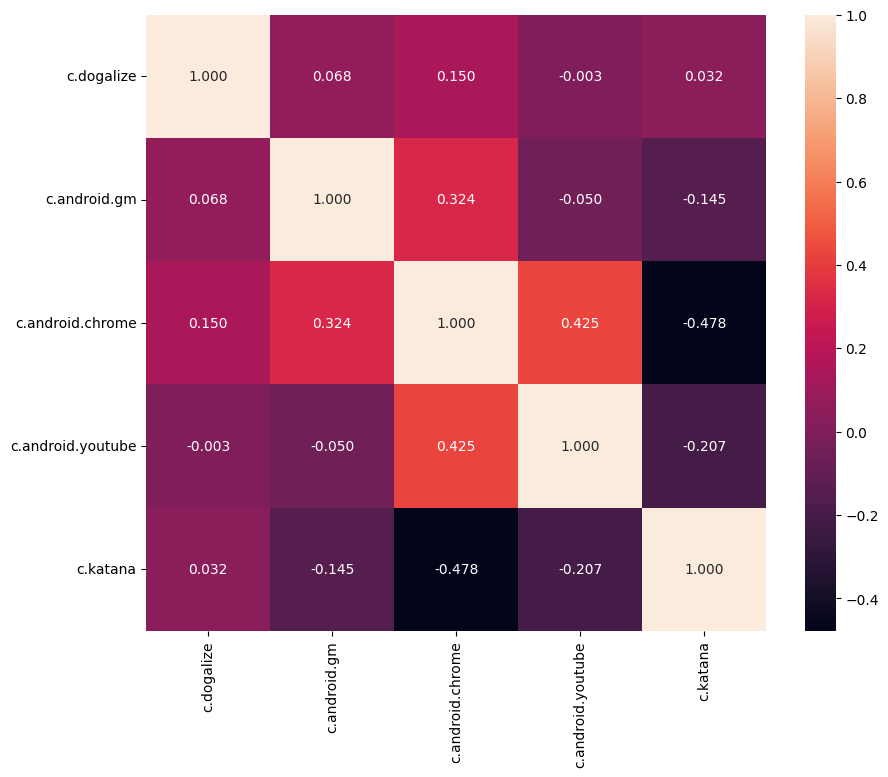

In [47]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(relevant_connections.drop(columns=["mwra", "imei", "ts"]).corr(), ax=ax, annot=True, fmt=".3f")

Z tejto mapy vidíme, že väčšina premnených spolu nesúvisí. Najvyššie hodnoty korelácie sú pri pároch:
- c.android.chrome a c.katana
- c.android.chrome a c.android.youtube
- c.android.chrome a c.android.gm

### Párová analýza: processes

<Axes: >

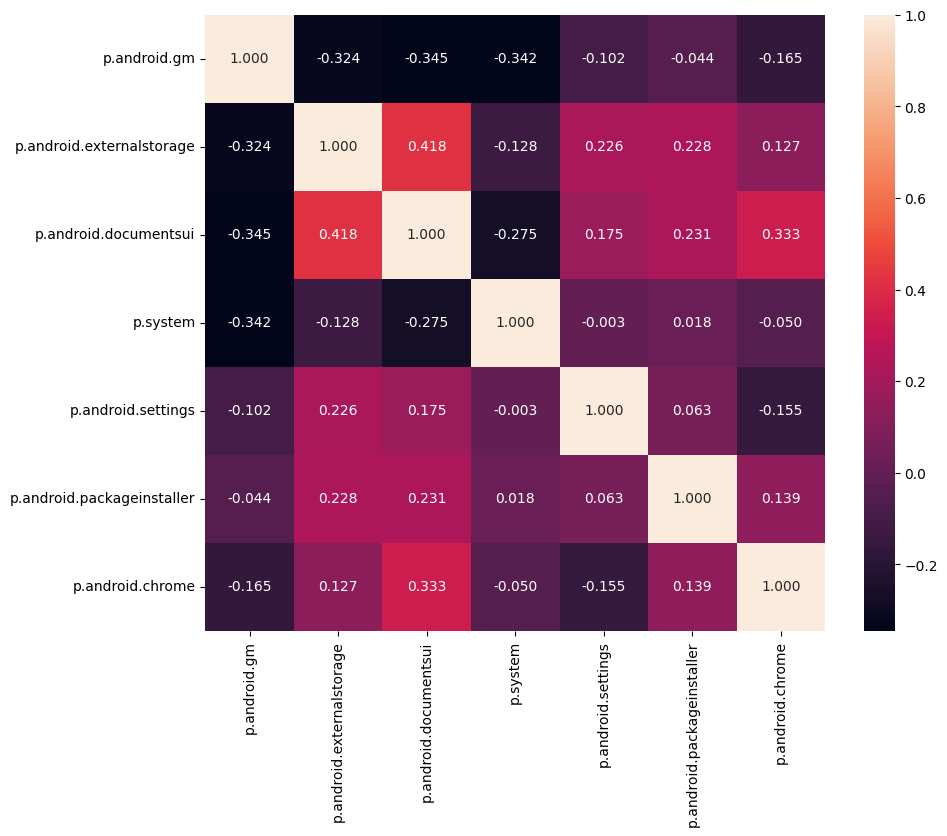

In [48]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(relevant_processes.drop(columns=["mwra", "imei", "ts"]).corr(), ax=ax, annot=True, fmt=".3f")

Z tejto mapy vidíme, že najvýznamnejšie negatívne korelácie sú medzi:
- p.android.gm a p.system
- p.android.gm a p.android.documentsui
- p.android.gm a p.android.externalstorage
  
A najvýznamnejšie pozitívne korelácie sú medzi:
- p.android.externalstorage a p.android.documentsui
- p.android.documentsui a p.android.chrome

## D
Párová analýza dát: Identifikujte závislosti medzi predikovanou premennou a
ostatnými premennými (potenciálnymi prediktormi).

### Connections
Analýza závislosti predikovanej premennej od ostatných atribútov v rámci connections

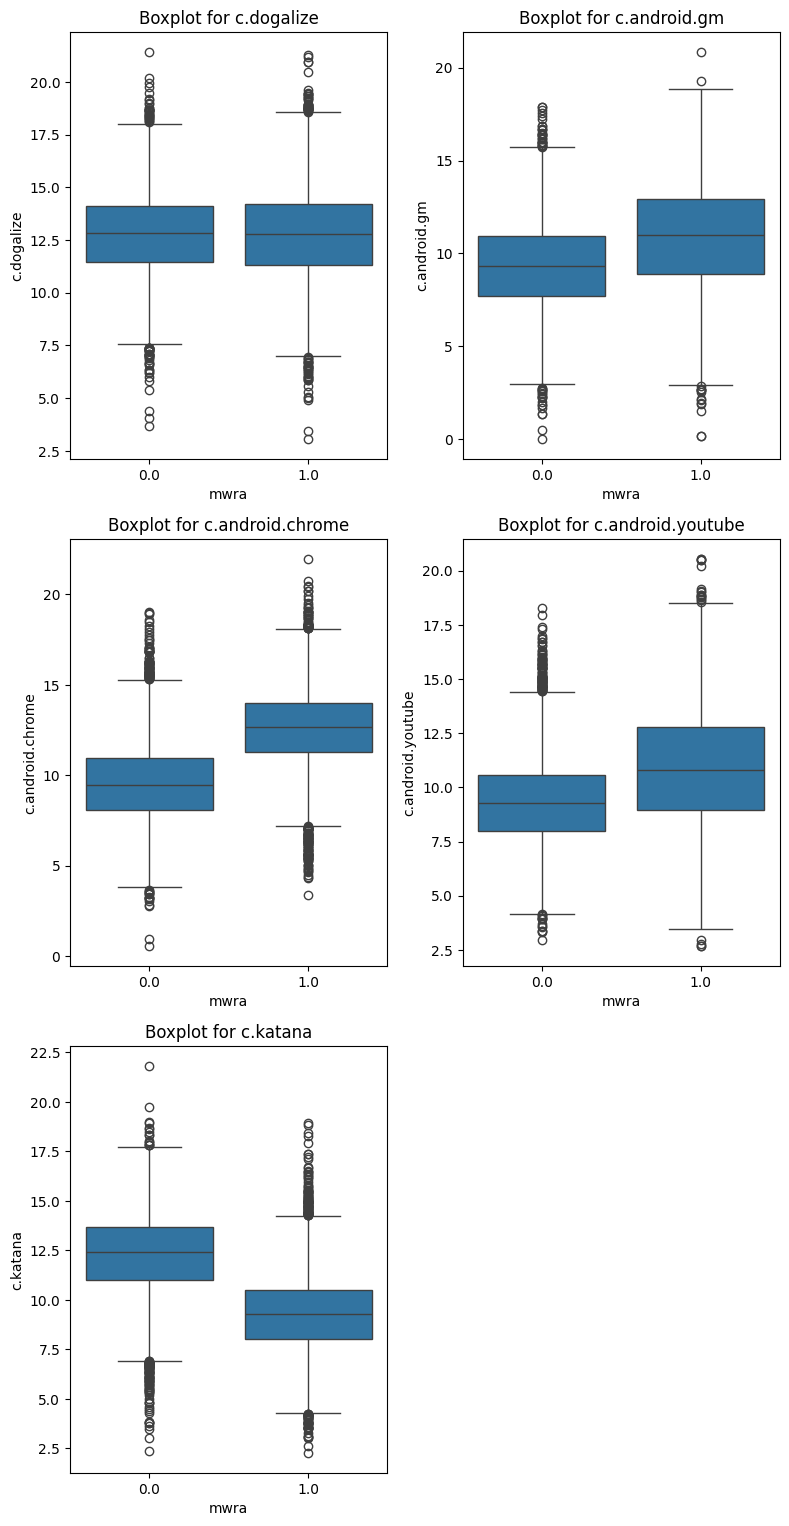

In [49]:
num_cols = len(relevant_connections.columns)
cols = 2
rows = (num_cols // cols) + (num_cols % cols > 0)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(8, rows * 5))
axes = axes.flatten()

for i, col in enumerate(relevant_connections.drop(columns=["mwra", "imei", "ts"]).columns):
    sns.boxplot(x='mwra', y=col, data=relevant_connections, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Z týchto grafov môžeme vidieť, že:
- hodnoty c.dogalize sú približne rovnaké, či bola zaznamenaná malvérová aktivita, alebo nie
- hodnoty c.android.youtube a c.android.gm sú trochu vyššie pri mwra = 1
- hodnoty c.android.chrome sú značne vyššie pri mwra = 1
- hodnoty c.katana sú značne nižšie pre mwra = 1

### Processes
Analýza závislosti predikovanej premennej od ostatných atribútov v rámci Processes

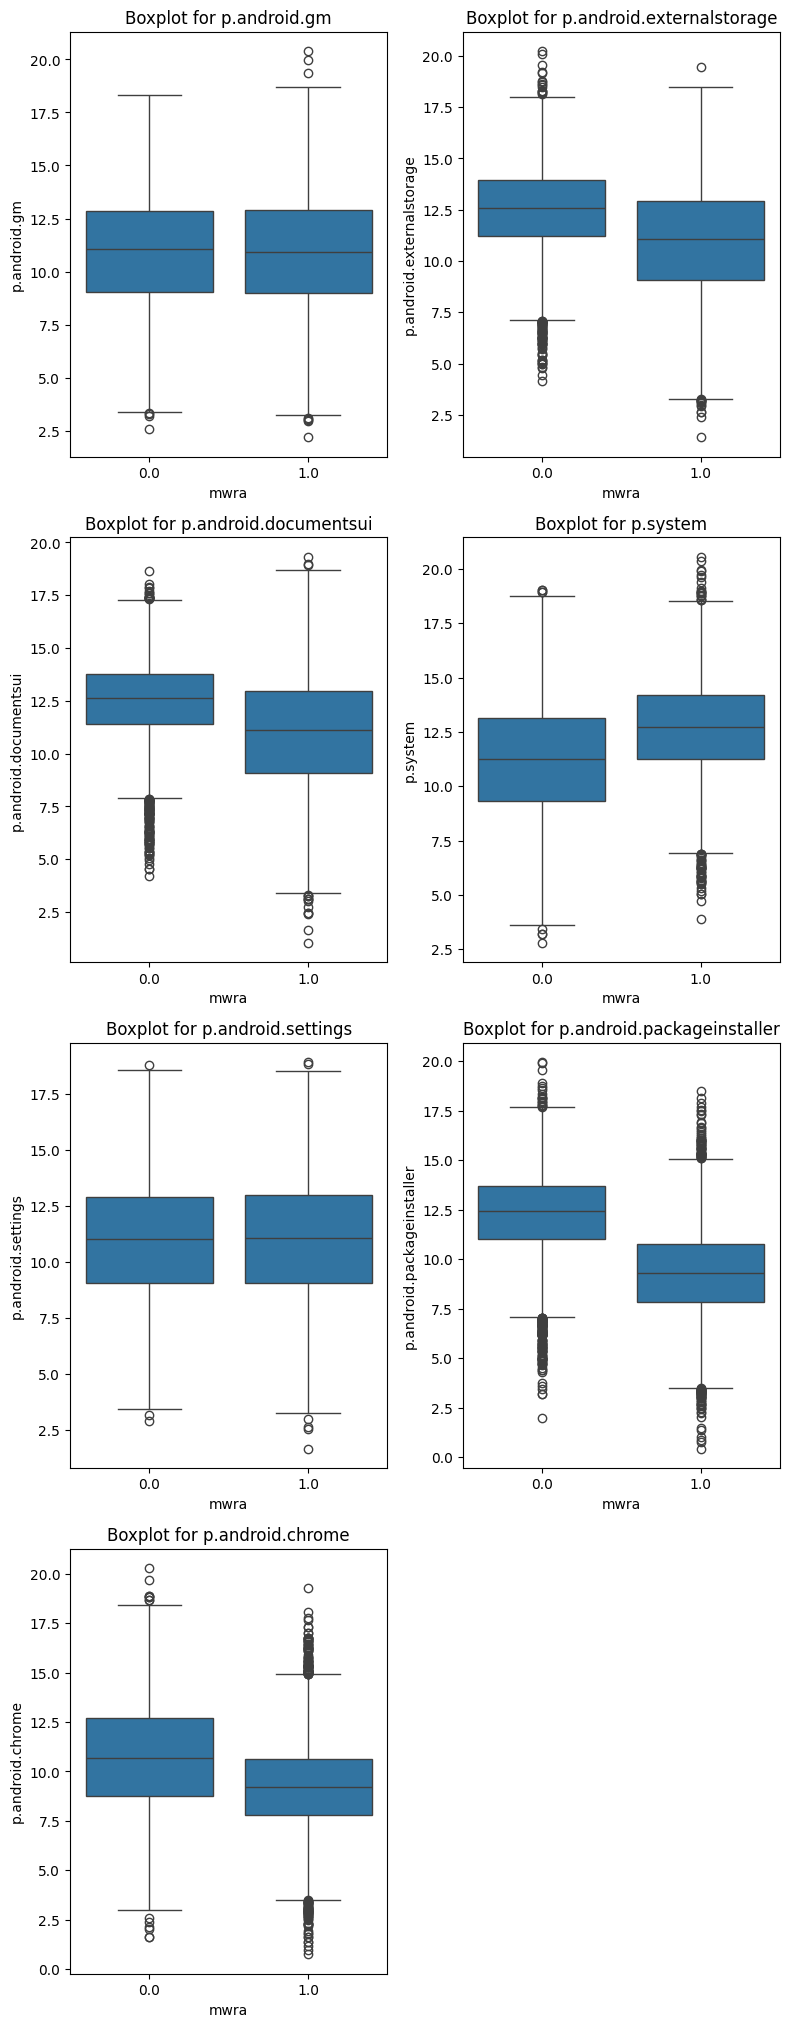

In [50]:
num_cols = len(relevant_processes.columns)
cols = 2
rows = (num_cols // cols) + (num_cols % cols > 0)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(8, rows * 5))
axes = axes.flatten()

for i, col in enumerate(relevant_processes.drop(columns=["mwra", "imei", "ts"]).columns):
    sns.boxplot(x='mwra', y=col, data=relevant_processes, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Z týchto grafov môžeme vidieť, že:
- hodnoty p.android.gm a p.android.settings sú približne rovnaké, či bola zaznamenaná malvérová aktivita, alebo nie
- hodnoty p.android.externalstorage, p.android.documentsui a p.android.chrome sú trochu nižšie pri mwra = 1
- hodnoty p.system sú trochu vyššie pri mwra = 1
- hodnoty p.android.packageinstaller sú značne nižšie pre mwra = 1

## E
Dokumentujte Vaše prvotné zamyslenie k riešeniu zadania projektu, napr. sú
niektoré atribúty medzi sebou závislé? od ktorých atribútov závisí predikovaná
premenná? či je potrebné kombinovať záznamy z viacerých súborov?

V rámci párovej analýzy sme našli určité závislosti medzi dvojimcami premenných, ako aj madzi ostatnými premennými a predikovanou premennou mwra. Hlavné párové závislosti sme našli medzi:
- c.android.chrome a c.katana (negatívna korelácia)
- c.android.chrome a c.android.youtube (pozitívna korelácia)
- c.android.chrome a c.android.gm (pozitívna korelácia)
- p.android.gm a p.system (negatívna korelácia)
- p.android.gm a p.android.documentsui (negatívna korelácia)
- p.android.gm a p.android.externalstorage (negatívna korelácia)
- p.android.externalstorage a p.android.documentsui (pozitívna korelácia)
- p.android.documentsui a p.android.chrome (pozitívna korelácia)

Hlavné závislosti medzi predikovanou premennou a ostatnými premennými, ktoré sme našli, sú medzi:
- hodnoty c.android.chrome sú značne vyššie pri mwra = 1
- hodnoty c.katana sú značne nižšie pre mwra = 1
- hodnoty p.android.packageinstaller sú značne nižšie pre mwra = 1

Pre párovú analýzu predikovanej premennej a ostatných premenných zatial nebolo potrebné kombinovať záznamy z viacerých súborov, keďže mwra sa nachádza aj v connections aj v processes. Kombinácia údajov zo súborov však určite poskytne ďaľšie informácie o možných párových závislostiach medzi ostatnými premennými z rôznych súborov, no, ako sme už vyššie uviedli, dáta nieje možné kombinovať dokopy, kým ich v ďalšej časti neprečistíme.

Z boxplotov časti D sa zdá že c.android.chrome by mohol mať vplyv na predikovanú premennú.

# 1.2 Identifikácia problémov, integrácia a čistenie dát

## A
Identifikujte aj prvotne riešte problémy v dátach napr.: nevhodná štruktúra dát,
duplicitné záznamy (riadky, stlpce), nejednotné formáty, chýbajúce hodnoty, vychýlené
hodnoty. V dátach sa môžu nachádzať aj iné, tu nevymenované problémy.

### Connections - problémy

#### Štruktúra dát a jednotnosť formátu dát

In [51]:
connections

,ts,imei,mwra,c.dogalize,c.android.gm,c.android.chrome,c.android.youtube,c.katana,c.updateassist,c.UCMobile.x86,c.android.vending,c.raider,c.UCMobile.intl
0,2018-05-05 10:00:00,3590433799317661966,1.0,9.03970,14.35315,13.76020,11.12559,6.73850,66.91554,54.28226,16.75773,4.64834,30.67838
1,2018-05-05 10:01:00,3590433799317661073,1.0,9.41478,7.51650,12.31292,12.55000,7.19936,32.67809,64.59178,29.13667,28.68688,59.46351
2,2018-05-05 10:02:00,359043379931766445,0.0,13.25806,7.23549,10.30754,7.77630,13.17780,55.29738,36.98063,65.83367,73.22975,37.54590
3,2018-05-05 10:03:00,3590433799317662014,0.0,11.41695,8.09047,8.96150,9.97905,11.82898,38.55251,46.93124,58.06052,15.85001,36.53092
4,2018-05-05 10:04:00,3590433799317661651,0.0,12.47250,9.28802,8.48795,8.60786,11.82816,43.46316,43.94921,47.15770,39.61245,38.15171
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15077,2018-05-12 09:23:00,3590433799317662378,1.0,15.77086,8.61051,11.03012,10.15978,12.09155,42.50334,50.90456,59.66197,90.52400,8.84655
15078,2018-05-08 00:42:00,863033069630348602,0.0,13.02408,9.78237,8.53987,12.10149,14.89826,54.62679,49.81482,63.73030,84.70029,65.61722
15079,2018-05-12 14:45:00,359043379931766452,1.0,13.37555,11.05658,13.46244,10.55221,8.06901,43.70792,48.55013,41.24144,74.84846,18.68231
15080,2018-05-13 21:23:00,863033069630348172,1.0,14.74960,14.52040,12.20072,11.74331,8.16739,58.70297,28.99249,37.73098,14.45778,39.69809


Dataset connections vyzerá, že má vhodnú štruktúru dát.

In [52]:
for col in connections.columns:
    print(connections[col].apply(type).value_counts())

ts
<class 'str'>    15082
Name: count, dtype: int64
imei
<class 'int'>    15082
Name: count, dtype: int64
mwra
<class 'float'>    15082
Name: count, dtype: int64
c.dogalize
<class 'float'>    15082
Name: count, dtype: int64
c.android.gm
<class 'float'>    15082
Name: count, dtype: int64
c.android.chrome
<class 'float'>    15082
Name: count, dtype: int64
c.android.youtube
<class 'float'>    15082
Name: count, dtype: int64
c.katana
<class 'float'>    15082
Name: count, dtype: int64
c.updateassist
<class 'float'>    15082
Name: count, dtype: int64
c.UCMobile.x86
<class 'float'>    15082
Name: count, dtype: int64
c.android.vending
<class 'float'>    15082
Name: count, dtype: int64
c.raider
<class 'float'>    15082
Name: count, dtype: int64
c.UCMobile.intl
<class 'float'>    15082
Name: count, dtype: int64


Môžeme vidieť, že v každom stĺpci v datasete connections je len jeden typ dát.

#### Duplicitné záznamy

In [53]:
rows_duplicates = connections[connections.duplicated()]
len(rows_duplicates)

179

V datasete connections sa nachádza 179 duplicitných riadkov, tak ich vymažeme.

In [54]:
connections.drop_duplicates(inplace=True)

In [55]:
columns_duplicates = connections.T[connections.T.duplicated()]
len(columns_duplicates)

0

V datasete connections sa nenachádzajú žiadne duplicitné stĺpce.

#### Unikátne hodnoty

In [56]:
for col in connections.columns:
    print(f"{col:20}: {len(connections[col].unique())}")

ts                  : 14903
imei                : 500
mwra                : 2
c.dogalize          : 14738
c.android.gm        : 14799
c.android.chrome    : 14801
c.android.youtube   : 14767
c.katana            : 14767
c.updateassist      : 14882
c.UCMobile.x86      : 14879
c.android.vending   : 14888
c.raider            : 14892
c.UCMobile.intl     : 14887


V tomto výpise vidíme, koľko unikátnych hodnôt sa vyskytuje v jednotlivých stĺpcoch.

#### Chýbajúce hodnoty

In [57]:
connections.isnull().sum()

ts                   0
imei                 0
mwra                 0
c.dogalize           0
c.android.gm         0
c.android.chrome     0
c.android.youtube    0
c.katana             0
c.updateassist       0
c.UCMobile.x86       0
c.android.vending    0
c.raider             0
c.UCMobile.intl      0
dtype: int64

Môžeme vidieť, že v datasete connections nie sú žiadne chýbajúce hodnoty.

#### Vychýlené hodnoty

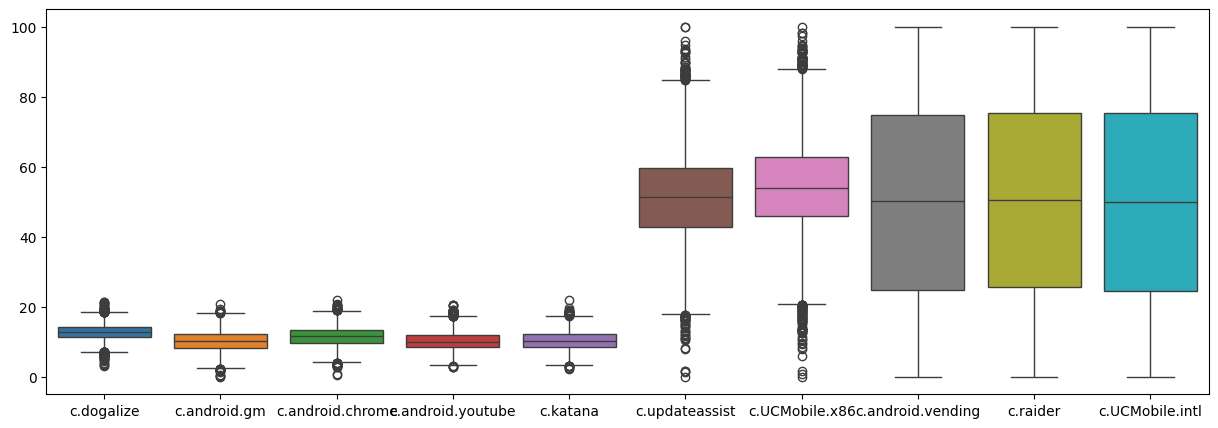

In [58]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=connections.drop(columns=["imei", "mwra", "ts"]))
plt.show()

In [59]:
connections_numeric = connections.select_dtypes(include=['number'])

Q1 = connections_numeric.quantile(0.25)
Q3 = connections_numeric.quantile(0.75)

IQR = Q3 - Q1

outliers = ((connections_numeric < (Q1 - 1.5 * IQR)) | 
            (connections_numeric > (Q3 + 1.5 * IQR)))

outliers_count = outliers.sum()

print(outliers_count)

imei                   0
mwra                   0
c.dogalize           150
c.android.gm          29
c.android.chrome      43
c.android.youtube     73
c.katana              36
c.updateassist        95
c.UCMobile.x86       136
c.android.vending      0
c.raider               0
c.UCMobile.intl        0
dtype: int64


Môžeme vidieť, že vychýlené hodnoty sa nachádzajú v atribútoch:
- c.dogalize: 150
- c.android.gm: 30
- c.android.chrome: 43
- c.android.youtube: 75
- c.katana: 36
- c.updateassist: 97
- c.UCMobile.x86: 137

### Devices - problémy

#### Štruktúra dát

In [60]:
devices

,latitude,longitude,store_name,code,location,imei
0,37.73222,115.70111,Hengshui,CN,Asia/Shanghai,359043379931766668
1,36.46917,10.78222,Beni Khiar,TN,Africa/Tunis,3590433799317661669
2,43.61092,3.87723,Montpellier,FR,Europe/Paris,359043379931766767
3,20.88953,-156.47432,Kahului,US,Pacific/Honolulu,359043379931766502
4,42.81900,47.11920,Buynaksk,RU,Europe/Moscow,3590433799317661370
...,...,...,...,...,...,...
2898,53.16167,6.76111,Hoogezand,NL,Europe/Amsterdam,863033069630348040
2899,-8.28333,-35.03333,Cabo,BR,America/Recife,359043379931766825
2900,48.77644,2.29026,Sceaux,FR,Europe/Paris,8630330696303481495
2901,6.25947,102.05461,Tak Bai,TH,Asia/Bangkok,863033069630348057


Z tabuľky môžeme vidieť, že stĺpec location sa skladá z 2 častí:
- región
- mesto

Bolo by vhodnejšie, tento stĺpec rozdeliť do 2 stĺpcov.

In [61]:
devices_fixed = devices.copy()

devices_fixed[["region", "city"]] = devices_fixed["location"].str.split("/", n=1, expand=True)

devices_fixed = devices_fixed.drop(columns=["location"])

devices_fixed.head()

,latitude,longitude,store_name,code,imei,region,city
0,37.73222,115.70111,Hengshui,CN,359043379931766668,Asia,Shanghai
1,36.46917,10.78222,Beni Khiar,TN,3590433799317661669,Africa,Tunis
2,43.61092,3.87723,Montpellier,FR,359043379931766767,Europe,Paris
3,20.88953,-156.47432,Kahului,US,359043379931766502,Pacific,Honolulu
4,42.81900,47.11920,Buynaksk,RU,3590433799317661370,Europe,Moscow


#### Chýbajúce hodnoty

In [62]:
for col in devices_fixed.columns:
    print(devices_fixed[col].apply(type).value_counts())

latitude
<class 'float'>    2903
Name: count, dtype: int64
longitude
<class 'float'>    2903
Name: count, dtype: int64
store_name
<class 'str'>    2903
Name: count, dtype: int64
code
<class 'str'>      2899
<class 'float'>       4
Name: count, dtype: int64
imei
<class 'int'>    2903
Name: count, dtype: int64
region
<class 'str'>    2903
Name: count, dtype: int64
city
<class 'str'>    2903
Name: count, dtype: int64


Môžeme vidieť, že v stĺpci code sa nachádzajú 4 hodnoty typu float.

In [63]:
float_rows = devices_fixed[devices_fixed['code'].apply(lambda x: isinstance(x, float))]
float_rows

,latitude,longitude,store_name,code,imei,region,city
376,-21.98333,16.91667,Okahandja,NaN,359043379931766072,Africa,Windhoek
1777,-21.98333,16.91667,Okahandja,NaN,3590433799317662493,Africa,Windhoek
2054,-21.98333,16.91667,Okahandja,NaN,359043379931766353,Africa,Windhoek
2141,-21.98333,16.91667,Okahandja,NaN,863033069630348164,Africa,Windhoek


Z tohto výpisu vidíme, že ide o riadky s hodnotou NaN, teda chýbajúce hodnoty

#### Duplicitné záznamy

In [64]:
rows_duplicates = devices_fixed[devices_fixed.duplicated()]
len(rows_duplicates)

7

V datasete devices sa nachádza 7 duplicitných riadkov, tak ich vymažeme.

In [65]:
devices_fixed.drop_duplicates(inplace=True)

In [66]:
columns_duplicates = devices_fixed.T[devices_fixed.T.duplicated()]
len(columns_duplicates)

0

V datasete devices sa nenachádzajú žiadne duplicitné stĺpce.

#### Nejednotné formáty

In [67]:
devices_fixed.head()

,latitude,longitude,store_name,code,imei,region,city
0,37.73222,115.70111,Hengshui,CN,359043379931766668,Asia,Shanghai
1,36.46917,10.78222,Beni Khiar,TN,3590433799317661669,Africa,Tunis
2,43.61092,3.87723,Montpellier,FR,359043379931766767,Europe,Paris
3,20.88953,-156.47432,Kahului,US,359043379931766502,Pacific,Honolulu
4,42.81900,47.11920,Buynaksk,RU,3590433799317661370,Europe,Moscow


Môžeme vidieť, že všetky dáta v jednotlivých atribútoch majú rovnaké formáty.

#### Unikátne hodnoty

In [68]:
for col in devices_fixed.columns:
    print(f"{col:20}: {len(devices_fixed[col].unique())}")

latitude            : 917
longitude           : 917
store_name          : 917
code                : 134
imei                : 499
region              : 8
city                : 183


V tomto výpise vidíme, koľko unikátnych hodnôt sa vyskytuje v jednotlivých stĺpcoch.

#### Vychýlené hodnoty

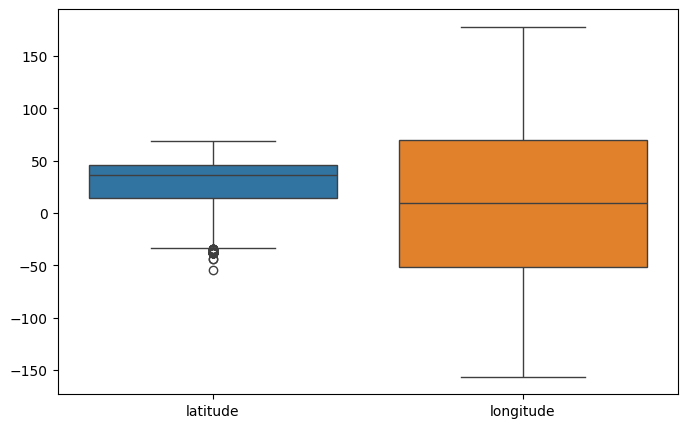

In [69]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=devices_fixed.drop(columns="imei"))
plt.show()

In [70]:
devices_numeric = devices_fixed.select_dtypes(include=['number'])

Q1 = devices_numeric.quantile(0.25)
Q3 = devices_numeric.quantile(0.75)

IQR = Q3 - Q1

outliers = ((devices_numeric < (Q1 - 1.5 * IQR)) | 
            (devices_numeric > (Q3 + 1.5 * IQR)))

outliers_count = outliers.sum()

print(outliers_count)

latitude     35
longitude     0
imei          0
dtype: int64


Môžeme vidieť, že vychýlené hodnoty sa nachádzajú v atribúte:
- latitude: 35

### Processes - problémy

#### Štruktúra dát

In [71]:
processes

,ts,imei,mwra,p.android.gm,p.android.externalstorage,p.android.documentsui,p.system,p.android.settings,p.android.packageinstaller,p.android.chrome,...,p.dogalize,p.inputmethod.latin,p.simulator,p.android.gms,p.android.vending,p.katana,p.process.gapps,p.google,p.olauncher,p.browser.provider
0,2018-05-05 10:00:00,3590433799317661966,1.0,13.08147,6.26446,7.97092,11.24427,11.08966,8.23662,11.58103,...,42.19751,79.40836,45.40991,87.15437,51.41012,69.25298,20.06545,13.62688,21.52231,84.08213
1,2018-05-05 10:01:00,3590433799317661073,1.0,9.52577,13.15723,10.12613,14.37023,14.36103,5.40400,7.72424,...,53.72498,39.27139,13.21933,74.91757,30.24281,53.84815,21.26466,7.85091,1.76933,40.47904
2,2018-05-05 10:02:00,359043379931766445,0.0,11.23775,13.43689,12.58645,7.63430,12.54228,12.04773,7.86555,...,43.77214,36.49072,86.97079,96.17420,7.71312,78.90782,8.32312,41.12966,75.38385,68.61776
3,2018-05-05 10:03:00,3590433799317662014,0.0,6.02527,11.05170,12.42098,16.98137,11.35344,11.37062,10.67391,...,55.74452,48.78629,9.34253,63.25140,61.82840,43.90015,83.45260,61.63458,13.99080,62.90951
4,2018-05-05 10:04:00,3590433799317661651,0.0,4.97925,11.86770,10.20366,15.33645,11.64182,12.93403,10.25430,...,17.59833,49.69782,7.07021,73.27845,46.34725,91.91502,19.71363,12.49803,80.71499,3.93994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15077,2018-05-12 09:23:00,3590433799317662378,1.0,14.47505,14.13467,11.21624,5.87868,13.80553,14.16713,9.88344,...,13.79764,81.07005,4.98040,89.44029,96.76488,41.22816,20.22869,89.79819,28.75708,84.52814
15078,2018-05-08 00:42:00,863033069630348602,0.0,13.21401,15.45254,9.84533,7.89759,12.16610,12.20072,6.76845,...,55.37315,72.77676,1.66713,81.66086,81.29094,51.00248,83.36484,13.55107,49.60604,60.11247
15079,2018-05-12 14:45:00,359043379931766452,1.0,9.04414,10.18079,10.72209,15.57543,8.76219,9.62208,10.03570,...,57.27067,32.89748,30.88785,88.40632,44.85070,95.63405,12.04731,34.57333,42.13735,30.76038
15080,2018-05-13 21:23:00,863033069630348172,1.0,11.98887,11.55925,8.42129,14.72851,11.41729,11.08686,9.19337,...,61.55000,93.71391,60.14893,7.55667,24.31082,4.92494,2.72571,10.70286,53.82865,16.23903


Dataset processes vyzerá, že má vhodnú štruktúru dát.

In [72]:
for col in processes.columns:
    print(processes[col].apply(type).value_counts())

ts
<class 'str'>    15082
Name: count, dtype: int64
imei
<class 'int'>    15082
Name: count, dtype: int64
mwra
<class 'float'>    15082
Name: count, dtype: int64
p.android.gm
<class 'float'>    15082
Name: count, dtype: int64
p.android.externalstorage
<class 'float'>    15082
Name: count, dtype: int64
p.android.documentsui
<class 'float'>    15082
Name: count, dtype: int64
p.system
<class 'float'>    15082
Name: count, dtype: int64
p.android.settings
<class 'float'>    15082
Name: count, dtype: int64
p.android.packageinstaller
<class 'float'>    15082
Name: count, dtype: int64
p.android.chrome
<class 'float'>    15082
Name: count, dtype: int64
p.android.defcontainer
<class 'float'>    15082
Name: count, dtype: int64
p.gms.persistent
<class 'float'>    15082
Name: count, dtype: int64
p.notifier
<class 'float'>    15082
Name: count, dtype: int64
p.dogalize
<class 'float'>    15082
Name: count, dtype: int64
p.inputmethod.latin
<class 'float'>    15082
Name: count, dtype: int64
p.simulator

Môžeme vidieť, že v každom stĺpci v datasete processes je len jeden typ dát.

#### Duplicitné záznamy

In [73]:
rows_duplicates = processes[processes.duplicated()]
len(rows_duplicates)

179

V datasete processes sa nachádza 179 duplicitných riadkov, tak ich vymažeme.

In [74]:
processes.drop_duplicates(inplace=True)

In [75]:
columns_duplicates = processes.T[processes.T.duplicated()]
len(columns_duplicates)

0

V datasete processes sa nenachádzajú žiadne duplicitné stĺpce.

#### Nejednotné formáty

In [76]:
processes.head()

,ts,imei,mwra,p.android.gm,p.android.externalstorage,p.android.documentsui,p.system,p.android.settings,p.android.packageinstaller,p.android.chrome,...,p.dogalize,p.inputmethod.latin,p.simulator,p.android.gms,p.android.vending,p.katana,p.process.gapps,p.google,p.olauncher,p.browser.provider
0,2018-05-05 10:00:00,3590433799317661966,1.0,13.08147,6.26446,7.97092,11.24427,11.08966,8.23662,11.58103,...,42.19751,79.40836,45.40991,87.15437,51.41012,69.25298,20.06545,13.62688,21.52231,84.08213
1,2018-05-05 10:01:00,3590433799317661073,1.0,9.52577,13.15723,10.12613,14.37023,14.36103,5.40400,7.72424,...,53.72498,39.27139,13.21933,74.91757,30.24281,53.84815,21.26466,7.85091,1.76933,40.47904
2,2018-05-05 10:02:00,359043379931766445,0.0,11.23775,13.43689,12.58645,7.63430,12.54228,12.04773,7.86555,...,43.77214,36.49072,86.97079,96.17420,7.71312,78.90782,8.32312,41.12966,75.38385,68.61776
3,2018-05-05 10:03:00,3590433799317662014,0.0,6.02527,11.05170,12.42098,16.98137,11.35344,11.37062,10.67391,...,55.74452,48.78629,9.34253,63.25140,61.82840,43.90015,83.45260,61.63458,13.99080,62.90951
4,2018-05-05 10:04:00,3590433799317661651,0.0,4.97925,11.86770,10.20366,15.33645,11.64182,12.93403,10.25430,...,17.59833,49.69782,7.07021,73.27845,46.34725,91.91502,19.71363,12.49803,80.71499,3.93994


Môžeme vidieť, že všetky dáta v jednotlivých atribútoch majú rovnaké formáty.

#### Unikátne hodnoty

In [77]:
for col in processes.columns:
    print(f"{col:30}: {len(processes[col].unique())}")

ts                            : 14903
imei                          : 500
mwra                          : 2
p.android.gm                  : 14782
p.android.externalstorage     : 14795
p.android.documentsui         : 14753
p.system                      : 14774
p.android.settings            : 14793
p.android.packageinstaller    : 14788
p.android.chrome              : 14782
p.android.defcontainer        : 8367
p.gms.persistent              : 14880
p.notifier                    : 14883
p.dogalize                    : 14879
p.inputmethod.latin           : 14891
p.simulator                   : 14894
p.android.gms                 : 14899
p.android.vending             : 14891
p.katana                      : 14895
p.process.gapps               : 14895
p.google                      : 14890
p.olauncher                   : 14888
p.browser.provider            : 14896


V tomto výpise vidíme, koľko unikátnych hodnôt sa vyskytuje v jednotlivých stĺpcoch.

#### Chýbajúce hodnoty

In [78]:
processes.isnull().sum()

ts                            0
imei                          0
mwra                          0
p.android.gm                  0
p.android.externalstorage     0
p.android.documentsui         0
p.system                      0
p.android.settings            0
p.android.packageinstaller    0
p.android.chrome              0
p.android.defcontainer        0
p.gms.persistent              0
p.notifier                    0
p.dogalize                    0
p.inputmethod.latin           0
p.simulator                   0
p.android.gms                 0
p.android.vending             0
p.katana                      0
p.process.gapps               0
p.google                      0
p.olauncher                   0
p.browser.provider            0
dtype: int64

Môžeme vidieť, že v datasete processes nie sú žiadne chýbajúce hodnoty.

#### Vychýlené hodnoty

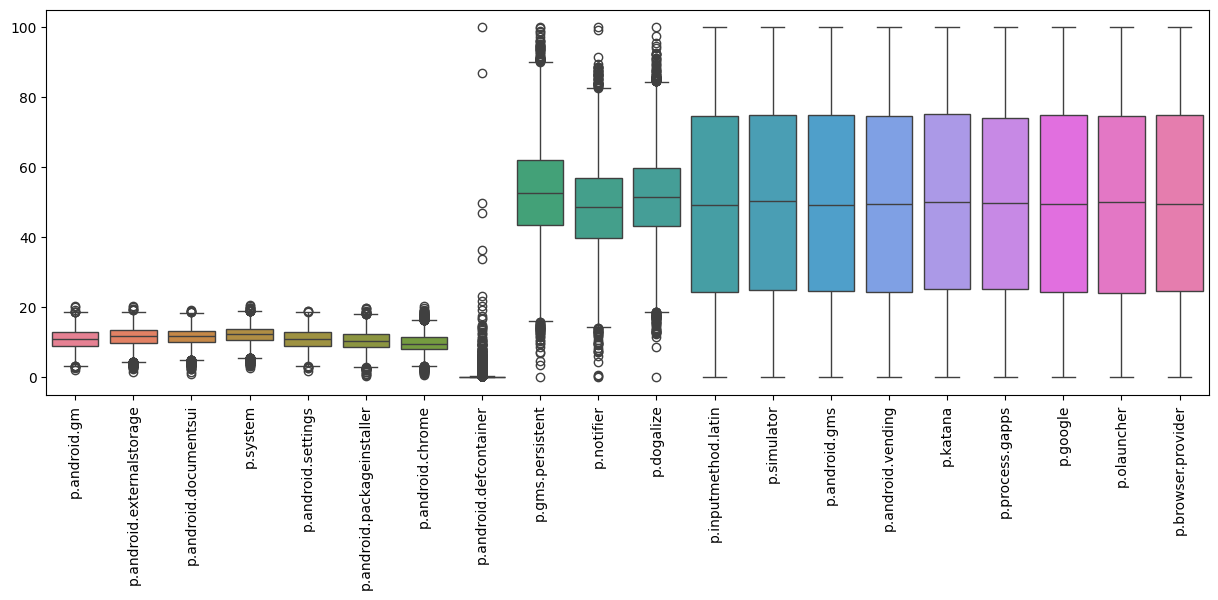

In [79]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=processes.drop(columns=["imei", "mwra", "ts"]), ax=ax)
plt.xticks(rotation=90)
plt.show()

In [80]:
processes_numeric = processes.select_dtypes(include=['number'])

Q1 = processes_numeric.quantile(0.25)
Q3 = processes_numeric.quantile(0.75)

IQR = Q3 - Q1

outliers = ((processes_numeric < (Q1 - 1.5 * IQR)) | 
            (processes_numeric > (Q3 + 1.5 * IQR)))

outliers_count = outliers.sum()

print(outliers_count)

imei                             0
mwra                             0
p.android.gm                    15
p.android.externalstorage       53
p.android.documentsui           94
p.system                        96
p.android.settings               9
p.android.packageinstaller      34
p.android.chrome               179
p.android.defcontainer        2106
p.gms.persistent                89
p.notifier                      80
p.dogalize                     119
p.inputmethod.latin              0
p.simulator                      0
p.android.gms                    0
p.android.vending                0
p.katana                         0
p.process.gapps                  0
p.google                         0
p.olauncher                      0
p.browser.provider               0
dtype: int64


Môžeme vidieť, že vychýlené hodnoty sa nachádzajú v atribútoch:
- p.android.gm: 13
- p.android.externalstorage: 56
- p.android.documentsui: 96
- p.system: 96
- p.android.settings: 9
- p.android.packageinstaller: 34
- p.android.chrome: 183
- p.android.defcontainer: 2138
- p.gms.persistent: 90
- p.notifier: 81
- p.dogalize: 121

### Profiles - problémy

#### Štruktúra dát

In [81]:
profiles

,birthdate,user_id,registration,company,job,mail,residence,imei,current_location,username,ssn,name
0,NaN,847,2019/11/21,Mitchell-Solis,NaN,timothytaylor@yahoo.com,NaN,8630330696303481933,"(Decimal('-20.2706735'), Decimal('157.457919'))",aaron53,616-47-8424,Michael Wilson
1,NaN,1161,2022-11-08,"Gonzales, Ingram and Sanchez",Geophysical data processor,gonzalezmichael@gmail.com,NaN,8630330696303481099,"(Decimal('-53.811515'), Decimal('24.770391'))",nicole50,537-31-1859,James Long
2,1940-10-02,1255,"06/04/2018, 00:00:00",Rowland LLC,NaN,sarahgreene@yahoo.com,NaN,3590433799317661909,"(Decimal('79.3383185'), Decimal('19.887697'))",amber66,427-45-3074,Keith Donovan
3,NaN,2069,2021-01-19,Pearson PLC,NaN,destinyholland@gmail.com,NaN,3590433799317661008,"(Decimal('-39.788237'), Decimal('115.687134'))",dana32,286-31-2534,Stephanie Bell
4,NaN,1648,21 Jan 2022,English LLC,NaN,thomas78@hotmail.com,"71251 Conway Divide Suite 608\nNorth Zachary, ...",359043379931766775,"(Decimal('16.925840'), Decimal('-82.703519'))",cbutler,252-18-1389,Randy Rodriguez
...,...,...,...,...,...,...,...,...,...,...,...,...
2592,NaN,1512,2022-03-23,Rangel-Griffin,NaN,turnermark@gmail.com,"214 Bullock Locks\nNew Scott, VT 61191",359043379931766262,"(Decimal('2.9626745'), Decimal('-162.135168'))",ydavis,430-88-9838,Brian Ruiz
2593,NaN,1669,2021-02-26,Norton-Rodgers,NaN,uroberts@hotmail.com,"75716 Beverly Station\nRoyburgh, LA 06337",863033069630348032,"(Decimal('-50.686532'), Decimal('0.906556'))",wesley44,203-64-7307,Meghan Sherman
2594,NaN,1393,2022/05/03,Fisher Ltd,NaN,sblack@hotmail.com,NaN,863033069630348719,"(Decimal('-29.435873'), Decimal('177.677070'))",belljoshua,703-54-5237,Heather Oconnor
2595,NaN,2278,05 Sep 2023,Castro Ltd,NaN,kclay@yahoo.com,"84549 James Highway\nNorth Clayton, GA 03383",359043379931766817,"(Decimal('2.323591'), Decimal('147.956382'))",uwalker,301-83-3347,Daniel Dixon


Z tabuľky môžeme vidieť, že v stĺpci current_location sú zvláštne uložené údaje, ako tuple, v ktorom sú 2 Decimal údaje.

Rozdelíme tento stĺpec na 2:
- latitude
- longitude

In [82]:
from decimal import Decimal

def extract_decimal_value(decimal_string, latitude=True):
    if isinstance(decimal_string, str):
        if latitude:
            return Decimal(decimal_string.strip()[10:-2])
        return Decimal(decimal_string.strip()[9:-3])
    return None

profiles_fixed = profiles.copy()

profiles_fixed[['latitude', 'longitude']] = profiles_fixed['current_location'].str.split(',', expand=True)
profiles_fixed['latitude'] = profiles_fixed['latitude'].apply(extract_decimal_value)
profiles_fixed['longitude'] = profiles_fixed['longitude'].apply(lambda x: extract_decimal_value(x, latitude=False))

profiles_fixed = profiles_fixed.where(pd.notnull(profiles_fixed), np.nan)

profiles_fixed = profiles_fixed.drop(columns=["current_location"])

profiles_fixed.head()

,birthdate,user_id,registration,company,job,mail,residence,imei,username,ssn,name,latitude,longitude
0,NaN,847,2019/11/21,Mitchell-Solis,NaN,timothytaylor@yahoo.com,NaN,8630330696303481933,aaron53,616-47-8424,Michael Wilson,-20.2706735,157.457919
1,NaN,1161,2022-11-08,"Gonzales, Ingram and Sanchez",Geophysical data processor,gonzalezmichael@gmail.com,NaN,8630330696303481099,nicole50,537-31-1859,James Long,-53.811515,24.770391
2,1940-10-02,1255,"06/04/2018, 00:00:00",Rowland LLC,NaN,sarahgreene@yahoo.com,NaN,3590433799317661909,amber66,427-45-3074,Keith Donovan,79.3383185,19.887697
3,NaN,2069,2021-01-19,Pearson PLC,NaN,destinyholland@gmail.com,NaN,3590433799317661008,dana32,286-31-2534,Stephanie Bell,-39.788237,115.687134
4,NaN,1648,21 Jan 2022,English LLC,NaN,thomas78@hotmail.com,"71251 Conway Divide Suite 608\nNorth Zachary, ...",359043379931766775,cbutler,252-18-1389,Randy Rodriguez,16.925840,-82.703519


Ďalším problémom v tomto datasete je stĺpec registration, kde dáta nemajú jednotný formát.

In [83]:
def convert_date(date_str):
    if isinstance(date_str, str):
        formats = [
            '%Y-%m-%d',
            '%Y/%m/%d',
            '%d/%m/%Y',
            '%d-%m-%Y',
            '%d %b %Y',
            '%d %B %Y',
            '%m/%d/%Y',
            '%m-%d-%Y',
            '%d/%m/%Y, %H:%M:%S',
            '%Y-%m-%d %H:%M:%S',
            '%d-%m-%Y, %H:%M:%S',
            '%m/%d/%Y, %H:%M:%S',
            '%B %d, %Y',
            '%B %d %Y'
        ]
        
        for fmt in formats:
            try:
                return pd.to_datetime(date_str, format=fmt)
            except ValueError:
                continue

    return pd.NaT


profiles_fixed['registration'] = profiles_fixed['registration'].apply(convert_date)
profiles_fixed['registration'] = profiles_fixed['registration'].dt.strftime('%Y-%m-%d')

profiles_fixed

,birthdate,user_id,registration,company,job,mail,residence,imei,username,ssn,name,latitude,longitude
0,NaN,847,2019-11-21,Mitchell-Solis,NaN,timothytaylor@yahoo.com,NaN,8630330696303481933,aaron53,616-47-8424,Michael Wilson,-20.2706735,157.457919
1,NaN,1161,2022-11-08,"Gonzales, Ingram and Sanchez",Geophysical data processor,gonzalezmichael@gmail.com,NaN,8630330696303481099,nicole50,537-31-1859,James Long,-53.811515,24.770391
2,1940-10-02,1255,2018-04-06,Rowland LLC,NaN,sarahgreene@yahoo.com,NaN,3590433799317661909,amber66,427-45-3074,Keith Donovan,79.3383185,19.887697
3,NaN,2069,2021-01-19,Pearson PLC,NaN,destinyholland@gmail.com,NaN,3590433799317661008,dana32,286-31-2534,Stephanie Bell,-39.788237,115.687134
4,NaN,1648,2022-01-21,English LLC,NaN,thomas78@hotmail.com,"71251 Conway Divide Suite 608\nNorth Zachary, ...",359043379931766775,cbutler,252-18-1389,Randy Rodriguez,16.925840,-82.703519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,NaN,1512,2022-03-23,Rangel-Griffin,NaN,turnermark@gmail.com,"214 Bullock Locks\nNew Scott, VT 61191",359043379931766262,ydavis,430-88-9838,Brian Ruiz,2.9626745,-162.135168
2593,NaN,1669,2021-02-26,Norton-Rodgers,NaN,uroberts@hotmail.com,"75716 Beverly Station\nRoyburgh, LA 06337",863033069630348032,wesley44,203-64-7307,Meghan Sherman,-50.686532,0.906556
2594,NaN,1393,2022-05-03,Fisher Ltd,NaN,sblack@hotmail.com,NaN,863033069630348719,belljoshua,703-54-5237,Heather Oconnor,-29.435873,177.677070
2595,NaN,2278,2023-09-05,Castro Ltd,NaN,kclay@yahoo.com,"84549 James Highway\nNorth Clayton, GA 03383",359043379931766817,uwalker,301-83-3347,Daniel Dixon,2.323591,147.956382


In [84]:
for col in profiles_fixed.columns:
    print(profiles_fixed[col].apply(type).value_counts())

birthdate
<class 'str'>      1428
<class 'float'>    1169
Name: count, dtype: int64
user_id
<class 'int'>    2597
Name: count, dtype: int64
registration
<class 'str'>    2597
Name: count, dtype: int64
company
<class 'str'>    2597
Name: count, dtype: int64
job
<class 'float'>    1818
<class 'str'>       779
Name: count, dtype: int64
mail
<class 'str'>    2597
Name: count, dtype: int64
residence
<class 'float'>    1688
<class 'str'>       909
Name: count, dtype: int64
imei
<class 'int'>    2597
Name: count, dtype: int64
username
<class 'str'>    2597
Name: count, dtype: int64
ssn
<class 'str'>    2597
Name: count, dtype: int64
name
<class 'str'>    2597
Name: count, dtype: int64
latitude
<class 'decimal.Decimal'>    2467
<class 'float'>               130
Name: count, dtype: int64
longitude
<class 'decimal.Decimal'>    2467
<class 'float'>               130
Name: count, dtype: int64


Môžeme vidieť, že v stĺpcoch birthdate, job, residence, latitude a longitude sa nachádzajú aj hodnoty typu float.

Zároveň v stĺpcoch 

In [85]:
float_rows = profiles_fixed[profiles_fixed['birthdate'].apply(lambda x: isinstance(x, float))]
float_rows.head()

,birthdate,user_id,registration,company,job,mail,residence,imei,username,ssn,name,latitude,longitude
0,NaN,847,2019-11-21,Mitchell-Solis,NaN,timothytaylor@yahoo.com,NaN,8630330696303481933,aaron53,616-47-8424,Michael Wilson,-20.2706735,157.457919
1,NaN,1161,2022-11-08,"Gonzales, Ingram and Sanchez",Geophysical data processor,gonzalezmichael@gmail.com,NaN,8630330696303481099,nicole50,537-31-1859,James Long,-53.811515,24.770391
3,NaN,2069,2021-01-19,Pearson PLC,NaN,destinyholland@gmail.com,NaN,3590433799317661008,dana32,286-31-2534,Stephanie Bell,-39.788237,115.687134
4,NaN,1648,2022-01-21,English LLC,NaN,thomas78@hotmail.com,"71251 Conway Divide Suite 608\nNorth Zachary, ...",359043379931766775,cbutler,252-18-1389,Randy Rodriguez,16.925840,-82.703519
5,NaN,2051,2022-06-05,"Marsh, Mosley and Rodriguez",NaN,heatherglenn@hotmail.com,NaN,863033069630348420,rcampbell,868-02-7237,Paul Lindsey,80.0835545,127.029380


In [86]:
float_rows = profiles_fixed[profiles_fixed['job'].apply(lambda x: isinstance(x, float))]
float_rows.head()

,birthdate,user_id,registration,company,job,mail,residence,imei,username,ssn,name,latitude,longitude
0,NaN,847,2019-11-21,Mitchell-Solis,NaN,timothytaylor@yahoo.com,NaN,8630330696303481933,aaron53,616-47-8424,Michael Wilson,-20.2706735,157.457919
2,1940-10-02,1255,2018-04-06,Rowland LLC,NaN,sarahgreene@yahoo.com,NaN,3590433799317661909,amber66,427-45-3074,Keith Donovan,79.3383185,19.887697
3,NaN,2069,2021-01-19,Pearson PLC,NaN,destinyholland@gmail.com,NaN,3590433799317661008,dana32,286-31-2534,Stephanie Bell,-39.788237,115.687134
4,NaN,1648,2022-01-21,English LLC,NaN,thomas78@hotmail.com,"71251 Conway Divide Suite 608\nNorth Zachary, ...",359043379931766775,cbutler,252-18-1389,Randy Rodriguez,16.925840,-82.703519
5,NaN,2051,2022-06-05,"Marsh, Mosley and Rodriguez",NaN,heatherglenn@hotmail.com,NaN,863033069630348420,rcampbell,868-02-7237,Paul Lindsey,80.0835545,127.029380


In [87]:
float_rows = profiles_fixed[profiles_fixed['residence'].apply(lambda x: isinstance(x, float))]
float_rows.head()

,birthdate,user_id,registration,company,job,mail,residence,imei,username,ssn,name,latitude,longitude
0,NaN,847,2019-11-21,Mitchell-Solis,NaN,timothytaylor@yahoo.com,NaN,8630330696303481933,aaron53,616-47-8424,Michael Wilson,-20.2706735,157.457919
1,NaN,1161,2022-11-08,"Gonzales, Ingram and Sanchez",Geophysical data processor,gonzalezmichael@gmail.com,NaN,8630330696303481099,nicole50,537-31-1859,James Long,-53.811515,24.770391
2,1940-10-02,1255,2018-04-06,Rowland LLC,NaN,sarahgreene@yahoo.com,NaN,3590433799317661909,amber66,427-45-3074,Keith Donovan,79.3383185,19.887697
3,NaN,2069,2021-01-19,Pearson PLC,NaN,destinyholland@gmail.com,NaN,3590433799317661008,dana32,286-31-2534,Stephanie Bell,-39.788237,115.687134
5,NaN,2051,2022-06-05,"Marsh, Mosley and Rodriguez",NaN,heatherglenn@hotmail.com,NaN,863033069630348420,rcampbell,868-02-7237,Paul Lindsey,80.0835545,127.029380


In [88]:
float_rows = profiles_fixed[profiles_fixed['latitude'].apply(lambda x: isinstance(x, float))]
float_rows.head()

,birthdate,user_id,registration,company,job,mail,residence,imei,username,ssn,name,latitude,longitude
10,NaN,1598,2023-08-25,"Brown, Harrison and Juarez",Copy,albertchaney@gmail.com,NaN,863033069630348610,wvargas,064-09-6035,Paul Nelson,NaN,NaN
22,NaN,1698,2017-10-11,Lowe-Armstrong,NaN,hwoods@hotmail.com,NaN,8630330696303481578,chamberspatrick,698-30-5442,Anthony Harvey,NaN,NaN
28,2008-01-28,2354,2024-02-02,Rivera Ltd,NaN,ccooper@gmail.com,NaN,359043379931766510,franciscooper,557-56-6453,William Young,NaN,NaN
58,NaN,1145,2018-03-01,Johnston-Buckley,"Pharmacist, community",vmorrison@gmail.com,NaN,359043379931766882,claytonbaxter,830-38-0352,Lori Clark,NaN,NaN
63,1933-09-19,1375,2023-10-16,Daniels-Schneider,NaN,elizabethgross@hotmail.com,NaN,359043379931766866,tracyramsey,288-69-3499,Megan Crawford MD,NaN,NaN


In [89]:
float_rows = profiles_fixed[profiles_fixed['longitude'].apply(lambda x: isinstance(x, float))]
float_rows.head()

,birthdate,user_id,registration,company,job,mail,residence,imei,username,ssn,name,latitude,longitude
10,NaN,1598,2023-08-25,"Brown, Harrison and Juarez",Copy,albertchaney@gmail.com,NaN,863033069630348610,wvargas,064-09-6035,Paul Nelson,NaN,NaN
22,NaN,1698,2017-10-11,Lowe-Armstrong,NaN,hwoods@hotmail.com,NaN,8630330696303481578,chamberspatrick,698-30-5442,Anthony Harvey,NaN,NaN
28,2008-01-28,2354,2024-02-02,Rivera Ltd,NaN,ccooper@gmail.com,NaN,359043379931766510,franciscooper,557-56-6453,William Young,NaN,NaN
58,NaN,1145,2018-03-01,Johnston-Buckley,"Pharmacist, community",vmorrison@gmail.com,NaN,359043379931766882,claytonbaxter,830-38-0352,Lori Clark,NaN,NaN
63,1933-09-19,1375,2023-10-16,Daniels-Schneider,NaN,elizabethgross@hotmail.com,NaN,359043379931766866,tracyramsey,288-69-3499,Megan Crawford MD,NaN,NaN


Z týchto výpisov vidíme, že ide o riadky s hodnotou NaN.

#### Duplicitné záznamy

In [90]:
rows_duplicates = profiles_fixed[profiles_fixed.duplicated()]
len(rows_duplicates)

0

V datasete profiles sa nenachádzajú žiadne duplicitné riadky.

In [91]:
columns_duplicates = profiles_fixed.T[profiles_fixed.T.duplicated()]
len(columns_duplicates)

0

V datasete profiles sa nenachádzajú žiadne duplicitné stĺpce.

#### Nejednotné formáty

In [92]:
profiles_fixed.head()

,birthdate,user_id,registration,company,job,mail,residence,imei,username,ssn,name,latitude,longitude
0,NaN,847,2019-11-21,Mitchell-Solis,NaN,timothytaylor@yahoo.com,NaN,8630330696303481933,aaron53,616-47-8424,Michael Wilson,-20.2706735,157.457919
1,NaN,1161,2022-11-08,"Gonzales, Ingram and Sanchez",Geophysical data processor,gonzalezmichael@gmail.com,NaN,8630330696303481099,nicole50,537-31-1859,James Long,-53.811515,24.770391
2,1940-10-02,1255,2018-04-06,Rowland LLC,NaN,sarahgreene@yahoo.com,NaN,3590433799317661909,amber66,427-45-3074,Keith Donovan,79.3383185,19.887697
3,NaN,2069,2021-01-19,Pearson PLC,NaN,destinyholland@gmail.com,NaN,3590433799317661008,dana32,286-31-2534,Stephanie Bell,-39.788237,115.687134
4,NaN,1648,2022-01-21,English LLC,NaN,thomas78@hotmail.com,"71251 Conway Divide Suite 608\nNorth Zachary, ...",359043379931766775,cbutler,252-18-1389,Randy Rodriguez,16.925840,-82.703519


Môžeme vidieť, že všetky dáta v jednotlivých atribútoch už majú rovnaké formáty, keďže sme to opravili v predošlom bode.

#### Unikátne hodnoty

In [93]:
for col in profiles_fixed.columns:
    print(f"{col:20}: {len(profiles_fixed[col].unique())}")

birthdate           : 1413
user_id             : 1674
registration        : 1657
company             : 2460
job                 : 444
mail                : 2578
residence           : 910
imei                : 496
username            : 2554
ssn                 : 2597
name                : 2556
latitude            : 2468
longitude           : 2468


V tomto výpise vidíme, koľko unikátnych hodnôt sa vyskytuje v jednotlivých stĺpcoch.

#### Chýbajúce hodnoty

In [94]:
profiles_fixed.isnull().sum()

birthdate       1169
user_id            0
registration       0
company            0
job             1818
mail               0
residence       1688
imei               0
username           0
ssn                0
name               0
latitude         130
longitude        130
dtype: int64

Môžeme vidieť, že v datasete profiles je množstvo chýbajúcich hodnôt, a to konkrétne:
- birthdate: 1169
- registration: 403
- job: 1818
- residence: 1688
- latitude: 130
- longitude: 130

#### Vychýlené hodnoty

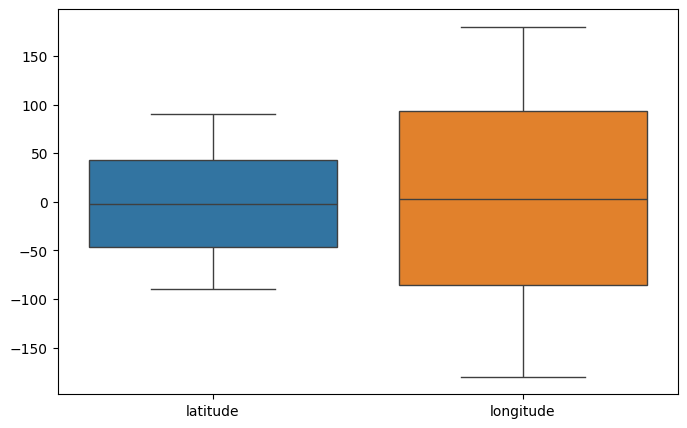

In [95]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=profiles_fixed.drop(columns=["imei", "user_id"]))
plt.show()

In [96]:
profiles_numeric = profiles_fixed.select_dtypes(include=['number'])

Q1 = profiles_numeric.quantile(0.25)
Q3 = profiles_numeric.quantile(0.75)

IQR = Q3 - Q1

outliers = ((profiles_numeric < (Q1 - 1.5 * IQR)) | 
            (profiles_numeric > (Q3 + 1.5 * IQR)))

outliers_count = outliers.sum()

print(outliers_count)

user_id    0
imei       0
dtype: int64


Môžeme vidieť, že v datasete profiles nie sú žiadne vychýlené hodnoty.

## B
Chýbajúce hodnoty (missing values): vyskúšajte riešiť problém min. 2 technikami
 - odstránenie pozorovaní s chýbajúcimi údajmi
 - nahradenie chýbajúcej hodnoty napr. mediánom, priemerom, pomerom, interpoláciou, alebo kNN

### Connections - chýbajúce hodnoty

In [97]:
connections.isnull().sum()

ts                   0
imei                 0
mwra                 0
c.dogalize           0
c.android.gm         0
c.android.chrome     0
c.android.youtube    0
c.katana             0
c.updateassist       0
c.UCMobile.x86       0
c.android.vending    0
c.raider             0
c.UCMobile.intl      0
dtype: int64

Môžeme vidieť, že v connections sa nenachádzajú žiadne chýbajúce hodnoty.

### Devices - chýbajúce hodnoty

In [98]:
devices_fixed.isnull().sum()

latitude      0
longitude     0
store_name    0
code          4
imei          0
region        0
city          0
dtype: int64

Môžeme vidieť, že v devices sa nachádzajú 4 chýbajúce hodnoty v atribúte code.

#### Odstránenie pozorovaní s chýbajúcimi údajmi

In [99]:
devices_fixed_without_missing = devices_fixed.dropna(subset=["code"])
print(devices_fixed_without_missing.isnull().sum())
print(devices_fixed_without_missing.shape)

latitude      0
longitude     0
store_name    0
code          0
imei          0
region        0
city          0
dtype: int64
(2892, 7)


#### Nahradenie chýbajúcich hodnôt módom

In [100]:
devices_fixed_mode = devices_fixed.copy()
modus_code = devices_fixed_mode['code'].mode()[0]

devices_fixed_mode['code'] = devices_fixed_mode['code'].fillna(modus_code)

In [101]:
devices_fixed_mode.isnull().sum()

latitude      0
longitude     0
store_name    0
code          0
imei          0
region        0
city          0
dtype: int64

#### Porovnanie vplyvu použitých techník vysporiadania sa s chýbajúcimi hodnotami na dataset

In [102]:
for ds_name, ds in [("devices_fixed", devices_fixed), 
                    ("devices_fixed_mode", devices_fixed_mode), 
                    ("devices_fixed_without_missing", devices_fixed_without_missing)]:
    print(f"{ds_name}: \n")
    print(ds["code"].value_counts())
    print("\n")

devices_fixed: 

code
US    469
IN    202
RU    154
DE    149
BR    119
     ... 
XK      1
PG      1
DO      1
RW      1
HN      1
Name: count, Length: 133, dtype: int64


devices_fixed_mode: 

code
US    473
IN    202
RU    154
DE    149
BR    119
     ... 
XK      1
PG      1
DO      1
RW      1
HN      1
Name: count, Length: 133, dtype: int64


devices_fixed_without_missing: 

code
US    469
IN    202
RU    154
DE    149
BR    119
     ... 
XK      1
PG      1
DO      1
RW      1
HN      1
Name: count, Length: 133, dtype: int64




Ako môžeme vidieť, pôvodný dataset a ten, kde sme NaN hodnoty vymazali má rovnaký počet unikátnych hodnôt v stĺpci code. Treba však ale poznamenať, že v datasete, kde sme riadky s chýbajúcimi hodnotami vymazali, sme prišli aj o iné dáta, čo môže byť nechcené.

V datasete, kde sme NaN nahradili najčastejšou hodnotou daného stĺpca, môžeme vidieť že počet hodnôt "US" stúpol o 4.

### Processes - chýbajúce hodnoty

In [103]:
processes.isnull().sum()

ts                            0
imei                          0
mwra                          0
p.android.gm                  0
p.android.externalstorage     0
p.android.documentsui         0
p.system                      0
p.android.settings            0
p.android.packageinstaller    0
p.android.chrome              0
p.android.defcontainer        0
p.gms.persistent              0
p.notifier                    0
p.dogalize                    0
p.inputmethod.latin           0
p.simulator                   0
p.android.gms                 0
p.android.vending             0
p.katana                      0
p.process.gapps               0
p.google                      0
p.olauncher                   0
p.browser.provider            0
dtype: int64

Môžeme vidieť, že v connections sa nenachádzajú žiadne chýbajúce hodnoty.

### Profiles - chýbajúce hodnoty

In [104]:
profiles_fixed.isnull().sum()

birthdate       1169
user_id            0
registration       0
company            0
job             1818
mail               0
residence       1688
imei               0
username           0
ssn                0
name               0
latitude         130
longitude        130
dtype: int64

In [105]:
nan_count = profiles_fixed.isnull().sum()

total_rows = profiles_fixed.shape[0]

nan_percentage = (nan_count / total_rows) * 100

nan_percentage

birthdate       45.013477
user_id          0.000000
registration     0.000000
company          0.000000
job             70.003851
mail             0.000000
residence       64.998075
imei             0.000000
username         0.000000
ssn              0.000000
name             0.000000
latitude         5.005776
longitude        5.005776
dtype: float64

Z predchádzajúcich výpisov môžeme vidieť, že v stĺpcoch:
- birthdate
- job
- residence

je veľmi veľký počet chýbajúcich hodnôt, ktoré sa prakticky ani nedajú efektívne nahradiť. Preto bude najlepšie, keď tieto stĺpce odstránime.

In [106]:
profiles_fixed = profiles_fixed.drop(columns=["birthdate", "job", "residence"])
profiles_fixed.isnull().sum()

user_id           0
registration      0
company           0
mail              0
imei              0
username          0
ssn               0
name              0
latitude        130
longitude       130
dtype: int64

#### Odstránenie pozorovaní s chýbajúcimi údajmi
Pre stĺpce longitude a latitude sa pokúsime chýbajúce hodnoty vyriešiť, aj keď ich je o trošku viac ako 5%.

In [107]:
profiles_fixed_without_missing = profiles_fixed.dropna(subset=["latitude", "longitude"])
print(profiles_fixed_without_missing.isnull().sum())
print(profiles_fixed_without_missing.shape)

user_id         0
registration    0
company         0
mail            0
imei            0
username        0
ssn             0
name            0
latitude        0
longitude       0
dtype: int64
(2467, 10)


#### Nahradenie chýbajúcich hodnôt priemerom

In [108]:
profiles_fixed_mean = profiles_fixed.copy()
mean_latitude = profiles_fixed_mean['latitude'].mean()
mean_longitude = profiles_fixed_mean['longitude'].mean()

profiles_fixed_mean['latitude'] = profiles_fixed_mean['latitude'].fillna(Decimal(mean_latitude))
profiles_fixed_mean['longitude'] = profiles_fixed_mean['longitude'].fillna(Decimal(mean_longitude))

In [109]:
profiles_fixed_mean.isnull().sum()

user_id         0
registration    0
company         0
mail            0
imei            0
username        0
ssn             0
name            0
latitude        0
longitude       0
dtype: int64

#### Porovnanie vplyvu použitých techník vysporiadania sa s chýbajúcimi hodnotami na dataset

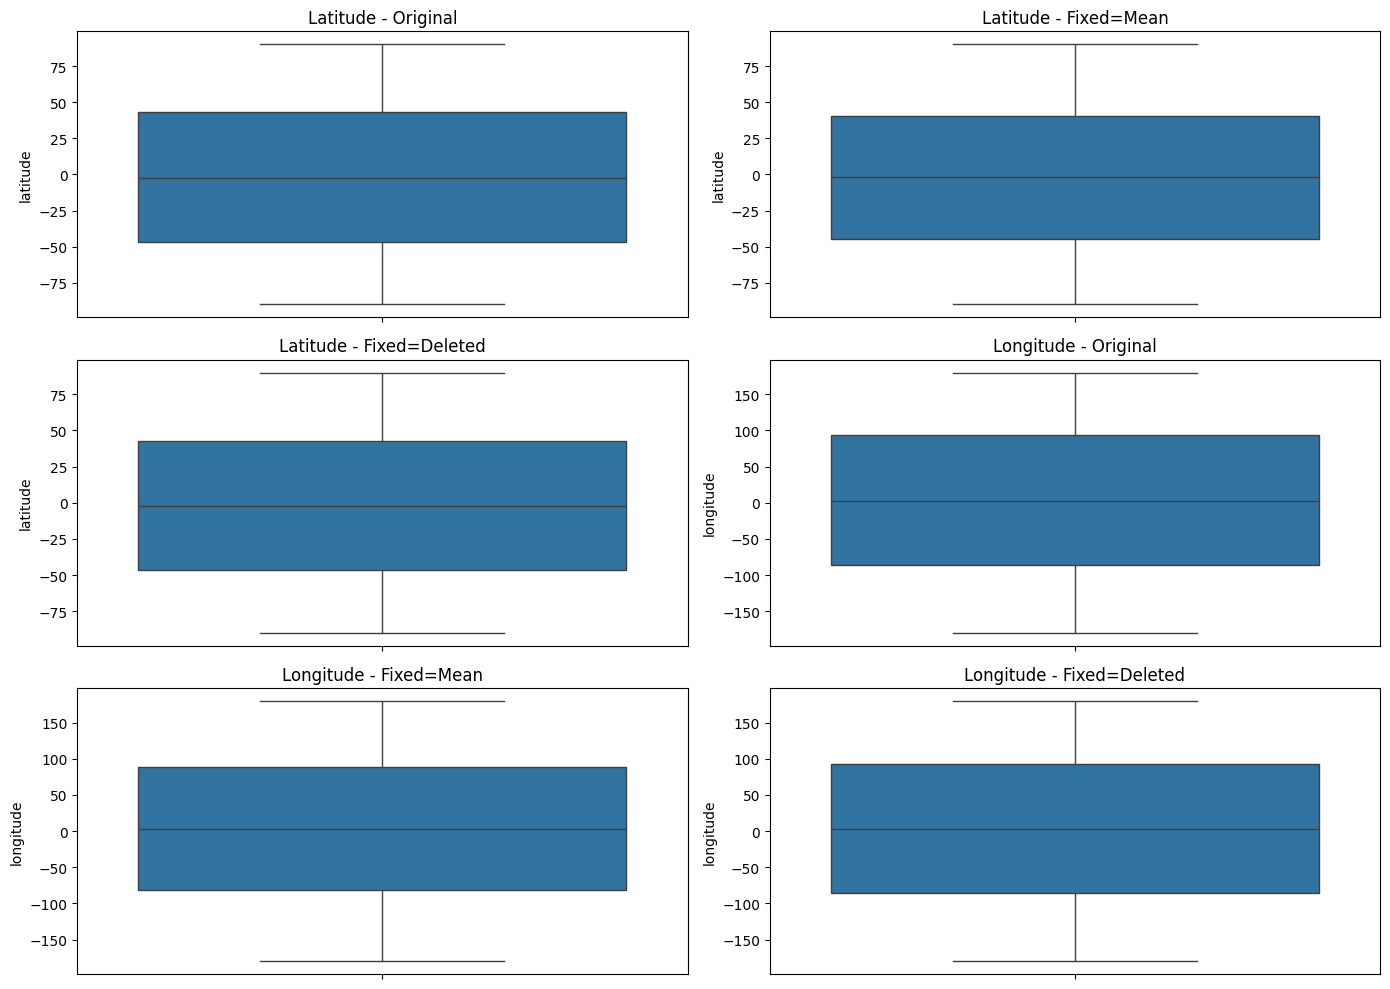

In [110]:
plt.figure(figsize=(14, 10))

# Boxploty pre "Latitude"
plt.subplot(3, 2, 1)
sns.boxplot(y='latitude', data=profiles_fixed)
plt.title('Latitude - Original')
plt.subplot(3, 2, 2)
sns.boxplot(y='latitude', data=profiles_fixed_mean)
plt.title('Latitude - Fixed=Mean')
plt.subplot(3, 2, 3)
sns.boxplot(y='latitude', data=profiles_fixed_without_missing)
plt.title('Latitude - Fixed=Deleted')

# Boxploty pre "Longitude"
plt.subplot(3, 2, 4)
sns.boxplot(y='longitude', data=profiles_fixed)
plt.title('Longitude - Original')
plt.subplot(3, 2, 5)
sns.boxplot(y='longitude', data=profiles_fixed_mean)
plt.title('Longitude - Fixed=Mean')
plt.subplot(3, 2, 6)
sns.boxplot(y='longitude', data=profiles_fixed_without_missing)
plt.title('Longitude - Fixed=Deleted')

plt.tight_layout()
plt.show()

In [111]:
mean_latitude_profiles = profiles_fixed['latitude'].mean()
mean_longitude_profiles = profiles_fixed['longitude'].mean()

mean_latitude_fixed_mean = profiles_fixed_mean['latitude'].mean()
mean_longitude_fixed_mean = profiles_fixed_mean['longitude'].mean()

mean_latitude_without_missing = profiles_fixed_without_missing['latitude'].mean()
mean_longitude_without_missing = profiles_fixed_without_missing['longitude'].mean()

print("Original Dataset (profiles):")
print(f"Mean Latitude: {mean_latitude_profiles}")
print(f"Mean Longitude: {mean_longitude_profiles}\n")

print("Fixed Mean Dataset (profiles_fixed_mean):")
print(f"Mean Latitude: {mean_latitude_fixed_mean}")
print(f"Mean Longitude: {mean_longitude_fixed_mean}\n")

print("Without Missing Dataset (profiles_fixed_without_missing):")
print(f"Mean Latitude: {mean_latitude_without_missing}")
print(f"Mean Longitude: {mean_longitude_without_missing}\n")

Original Dataset (profiles):
Mean Latitude: -1.5604092813133361
Mean Longitude: 2.2510037004458856

Fixed Mean Dataset (profiles_fixed_mean):
Mean Latitude: -1.560409281313336
Mean Longitude: 2.251003700445886

Without Missing Dataset (profiles_fixed_without_missing):
Mean Latitude: -1.5604092813133361
Mean Longitude: 2.2510037004458856



Z boxplotov a štatistík vidíme, že vlastnosti stĺpcov latitude a longitude sa nezmenili, ani keď sme ich nahradili priemerom, ani keď sme ich zmazali. Je to preto, že NaN hodnoty sa pri priemere nezarátavajú, čiže pôvodný dataset a dataset, kde sme ich vymazali majú rovnaký priemer. Tam kde sme NaN hodnoty nahradili priemerom sa celkový priemer tak isto nemení. 

Treba však poznamenať, že tam kde sme NaN hodnoty vymazali, sme stratili aj hodnoty ostatných stĺpcov v daných riadkoch a tak by sme mohli prísť o potenciálne zaujímavé dáta.

## C
 Vychýlené hodnoty (outlier detection), vyskúšajte riešiť problém min. 2 technikami
- odstránenie vychýlených alebo odľahlých pozorovaní
- nahradenie vychýlenej hodnoty hraničnými hodnotami rozdelenia (napr. 5%, 95%)
- vychýlené hodnoty sme našli v datasetoch devices, connections a processes

### Odstránenie vychýlených hodnôt

In [112]:
def drop_outliers(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    return df

In [113]:
devices_cleaned = drop_outliers(devices_fixed)

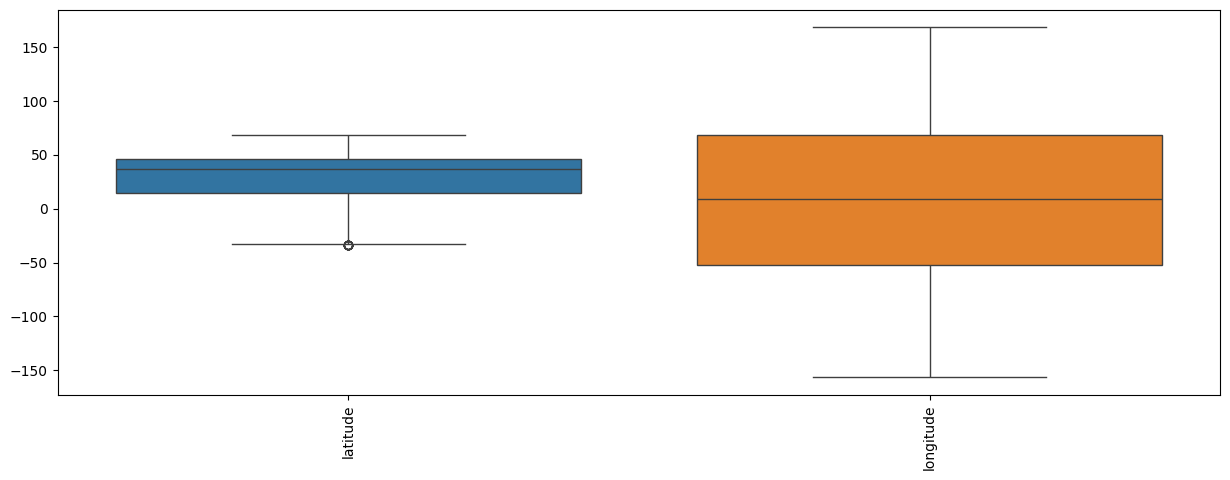

In [114]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=devices_cleaned.drop(columns=["imei"]), ax=ax)
plt.xticks(rotation=90)
plt.show()

In [115]:
processes_cleaned = drop_outliers(processes)

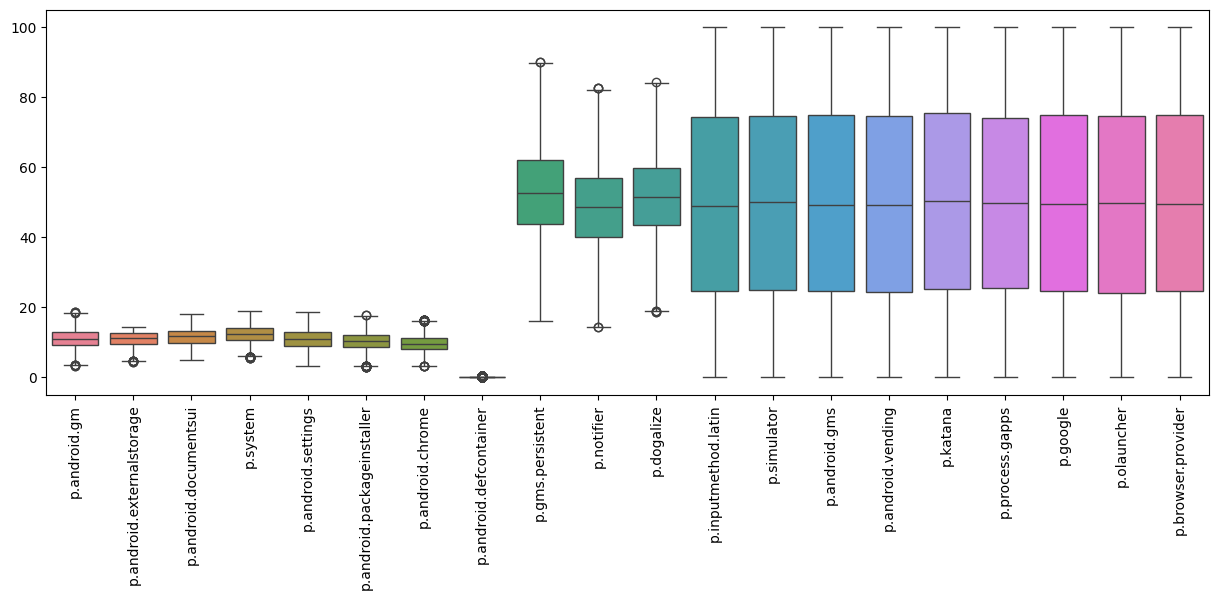

In [116]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=processes_cleaned.drop(columns=["imei", "mwra"]), ax=ax)
plt.xticks(rotation=90)
plt.show()

In [117]:
connections_cleaned = drop_outliers(connections)

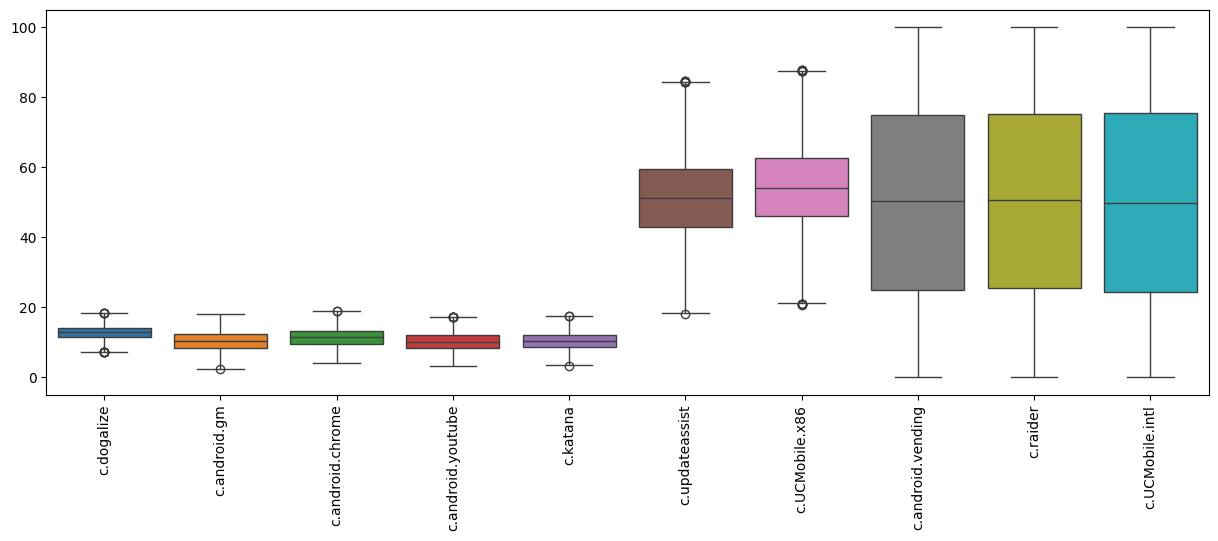

In [118]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=connections_cleaned.drop(columns=["imei", "mwra"]), ax=ax)
plt.xticks(rotation=90)
plt.show()

Z grafov vidíme, že distribúcie sa odstránením outlier hodnôt trochu upravili, stále však v každom datasete zostalo zopár outlier hodnôt, ktoré sú akurát pod hranicou odstraňovania. Navyše sa takto vymazali aj dáta z ostatných stĺpcov, čo je nechcené.

### Nahradenie vychýlených hodnôt hraničnými hodnotami

In [119]:
def modify_outliers(df):
    cleaned_data = df.copy()
    
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        lower_percentile = df[col].quantile(0.05)
        upper_percentile = df[col].quantile(0.95)
        
        cleaned_data[col] = df[col].clip(lower=lower_percentile, upper=upper_percentile)
    
    return cleaned_data

In [120]:
devices_cleaned2 = modify_outliers(devices_fixed)

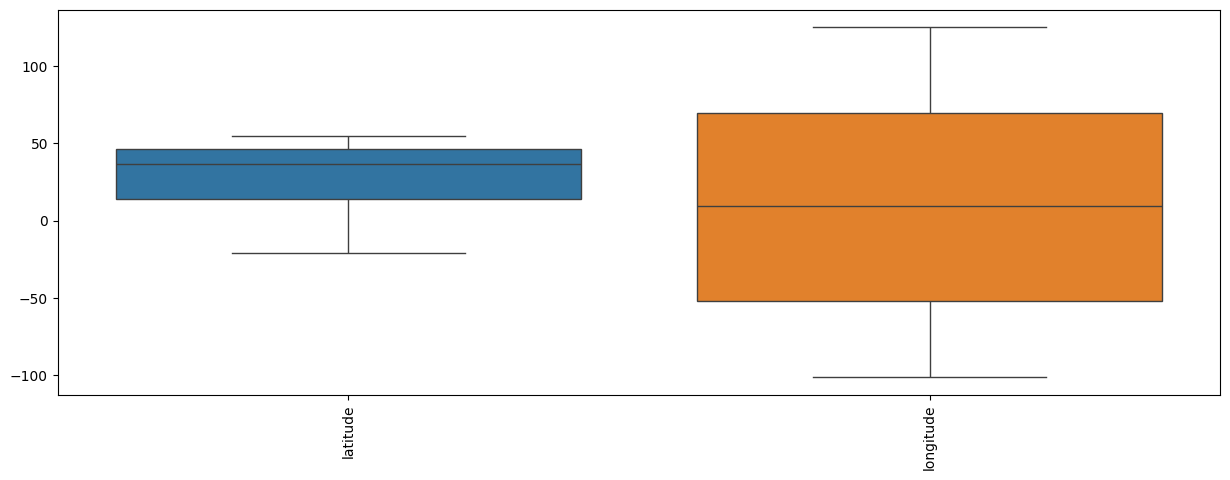

In [121]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=devices_cleaned2.drop(columns=["imei"]), ax=ax)
plt.xticks(rotation=90)
plt.show()

In [122]:
processes_cleaned2 = modify_outliers(processes)

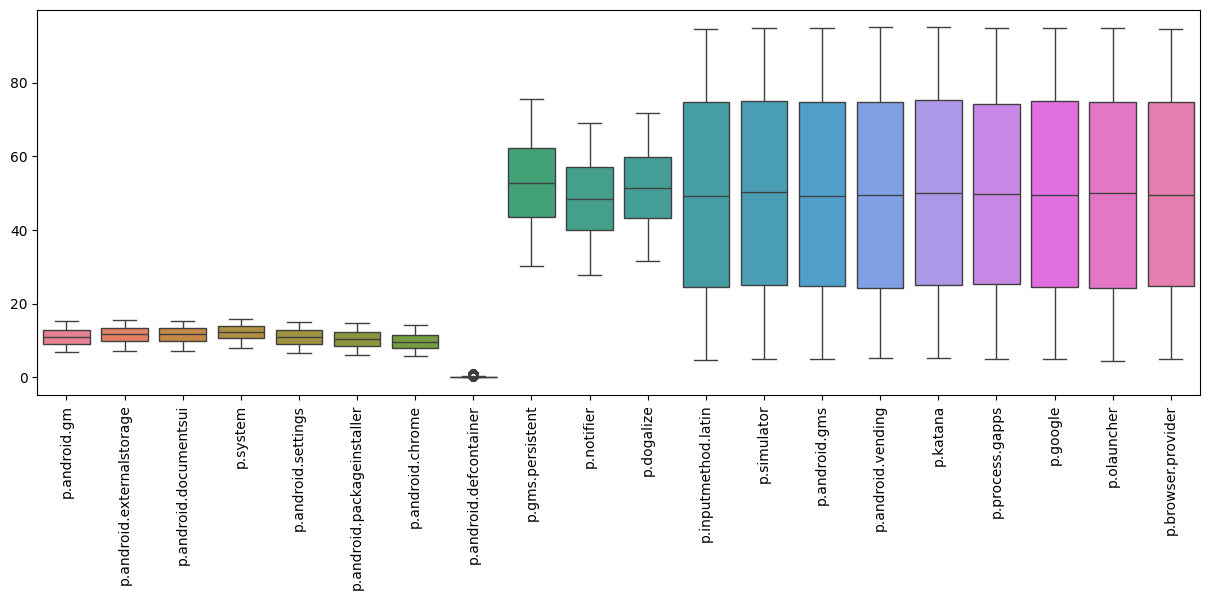

In [123]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=processes_cleaned2.drop(columns=["imei", "mwra"]), ax=ax)
plt.xticks(rotation=90)
plt.show()

In [124]:
connections_cleaned2 = modify_outliers(connections)

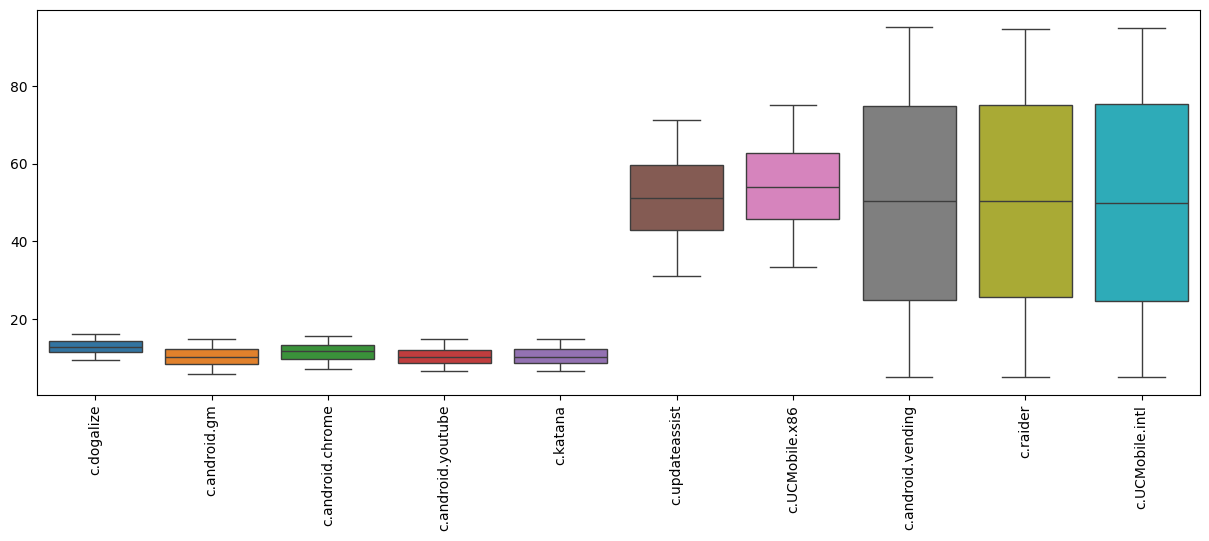

In [125]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=connections_cleaned2.drop(columns=["imei", "mwra"]), ax=ax)
plt.xticks(rotation=90)
plt.show()

Z grafov vidíme, že že týmto spôsobom sa outlier hodnoty skoro všade eliminovali, výnimkou je len stĺpec p.android.defcontainer v datasete processes. Keďže pri tejto metóde neprichádzame o žiadne dáta, je to lepšie ako prvá metóda.

# 1.3 Formulácia a štatistické overenie hypotéz o dátach

## A
Sformulujte dve hypotézy o dátach v kontexte zadanej predikčnej úlohy.
Formulované hypotézy overte vhodne zvolenými štatistickými testami
- hypoteza sa sklada z H0 a Ha

### Hypotéza 1

**$H_0$ (nulová hypotéza)**: Stĺpce c.android.youtube a c.android.chrome majú v priemere **rovnakú** hodnotu v stave mwra = 1.

**$H_1$ (alternatívna hypotéza)**: Stĺpce c.android.youtube a c.android.chrome majú v priemere **odlišnú** hodnotu v stave mwra = 1.

In [126]:
chrome = connections[connections['mwra'] == 1]['c.android.chrome']
youtube = connections[connections['mwra'] == 1]['c.android.youtube']

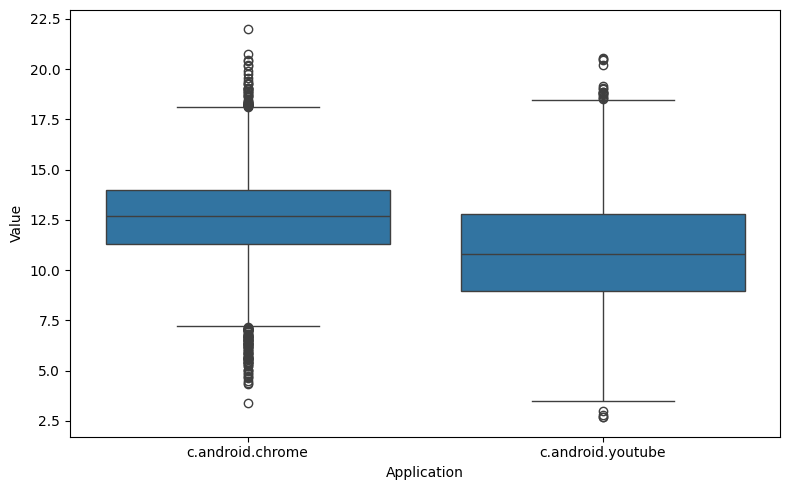

In [127]:
filtered_data = connections[connections['mwra'] == 1]

melted_data = pd.melt(filtered_data, value_vars=['c.android.chrome', 'c.android.youtube'], 
                      var_name='Application', value_name='Value')

plt.figure(figsize=(8, 5))
sns.boxplot(data=melted_data, x='Application', y='Value')

plt.tight_layout()
plt.show()

Na základe vizualizácie môžeme vidieť, že v stĺpcoch je rozdiel, ten ale môže byť skreslený početnými vychýlenými hodnotami.

In [128]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [129]:
chrome_out = identify_outliers(chrome)
chrome = chrome.drop(chrome_out.index)

youtube_out = identify_outliers(youtube)
youtube = youtube.drop(youtube_out.index)

Týmto kódom sme identifikovali a následne odstránili z našich vzoriek odľahlé hodnoty.

#### Kontrola normality dát

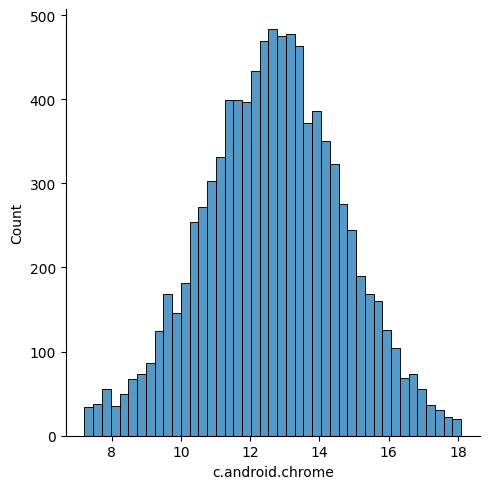

In [130]:
sns.displot(chrome)

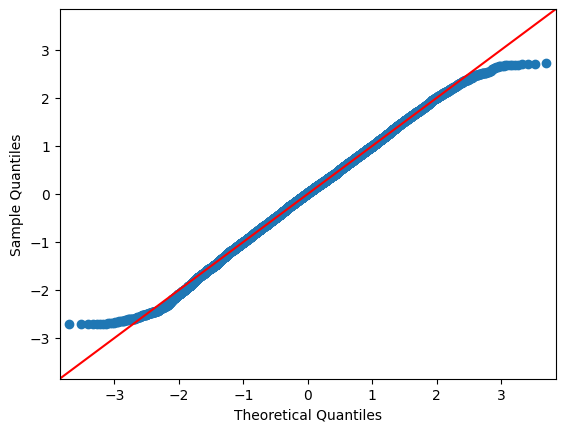

In [131]:
_ = sm.ProbPlot(chrome, fit=True).qqplot(line='45')

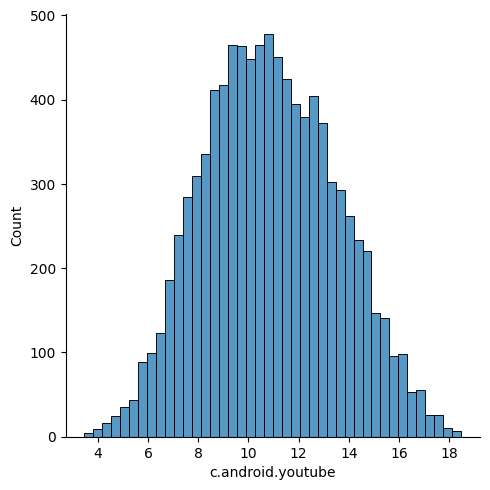

In [132]:
sns.displot(youtube)

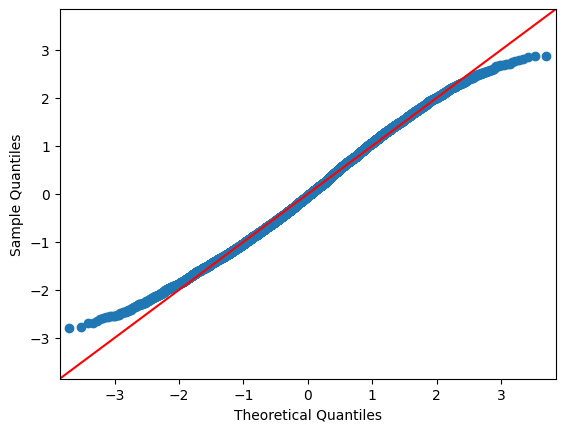

In [133]:
_ = sm.ProbPlot(youtube, fit=True).qqplot(line='45')

##### Shapiro-Wilk test

**$H_0$ (nulová hypotéza)**: Dáta **pochádzajú** z normálneho rozdelenia.

**$H_1$ (alternatívna hypotéza)**: Dáta **nepochádzajú** z normálneho rozdelenia.

ShapiroResult(statistic=np.float64(0.9980794415836104), pvalue=np.float64(2.5604577357932948e-09))
Non-Normal distribution (reject H0)


/Users/peterbrenkus/Desktop/skola/sem5/IAU/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9219.
  res = hypotest_fun_out(*samples, **kwds)


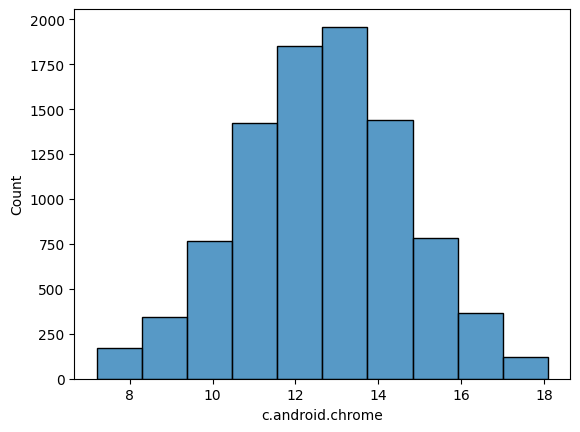

In [134]:
sns.histplot(chrome, bins=10)

shapiro_test = shapiro(chrome)
print(shapiro_test)

alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Non-Normal distribution (reject H0)')

ShapiroResult(statistic=np.float64(0.9951355465353271), pvalue=np.float64(3.1538837492390577e-17))
Non-Normal distribution (reject H0)


/Users/peterbrenkus/Desktop/skola/sem5/IAU/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9342.
  res = hypotest_fun_out(*samples, **kwds)


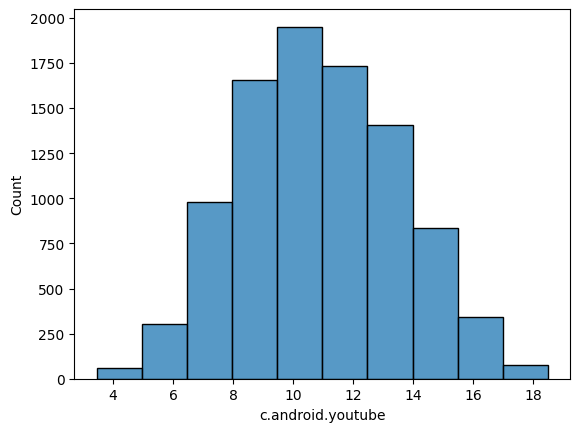

In [135]:
sns.histplot(youtube, bins=10)

shapiro_test = shapiro(youtube)
print(shapiro_test)

alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Non-Normal distribution (reject H0)')

Výsledky z Shapiro-Wilk testu hlásia, že náš sample je väčší, než je prípustné pre stabilné výsledky. Napriek tomu sa výsledky Shapiro-Wilk testu a zobrazenia QQ-plotov zhodujú v tom, že ani jeden z atribútov nepochádza z normálneho rozdelenia, a preto nemôžeme použiť t-test. Namiesto toho musíme použiť neparametrickú verziu tohto testu, teda **Mann-Whitney U-test**.

##### Mann-Whitney U test

**$H_0$ (nulová hypotéza)**: Stĺpce c.android.youtube a c.android.chrome majú v priemere **rovnakú** hodnotu v stave mwra = 1.
**$H_1$ (alternatívna hypotéza)**: Stĺpce c.android.youtube a c.android.chrome majú v priemere **odlišnú** hodnotu v stave mwra = 1.

Statistics=60426854.000, p=0.000
Different distribution (reject H0)


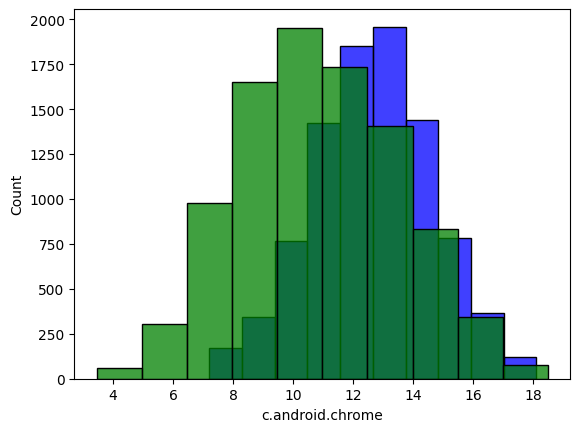

In [136]:
sns.histplot(chrome, bins=10, color="blue")
sns.histplot(youtube, bins=10, color="green")

stat, p = mannwhitneyu(chrome, youtube) 
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)') 
else:
    print('Different distribution (reject H0)')

Na základe vykonaného Mann-Whitney U testu môžeme vidieť, že dáta pochadzajú z rôznych distribúcií, teda máme dostatok dôkazov na vyvrátenie nulovej hypotézy.

Stĺpce c.android.youtube a c.android.chrome majú v priemere **odlišnú** hodnotu v stave mwra = 1. Rozdiel medzi stĺpcami s.android.youtube a c.android.chrome v stave mwra = 1 **je štatisticky signifikantný.**

### Hypotéza 2

**$H_0$ (nulová hypotéza)**: Stĺpce p.android.externalstorage a p.android.documentsui majú v priemere **rovnakú** hodnotu v stave mwra = 1.

**$H_1$ (alternatívna hypotéza)**: Stĺpce p.android.externalstorage a p.android.documentsui majú v priemere **odlišnú** hodnotu v stave mwra = 1.

In [137]:
storage = processes[processes['mwra'] == 1]['p.android.externalstorage']
documents = processes[processes['mwra'] == 1]['p.android.documentsui']

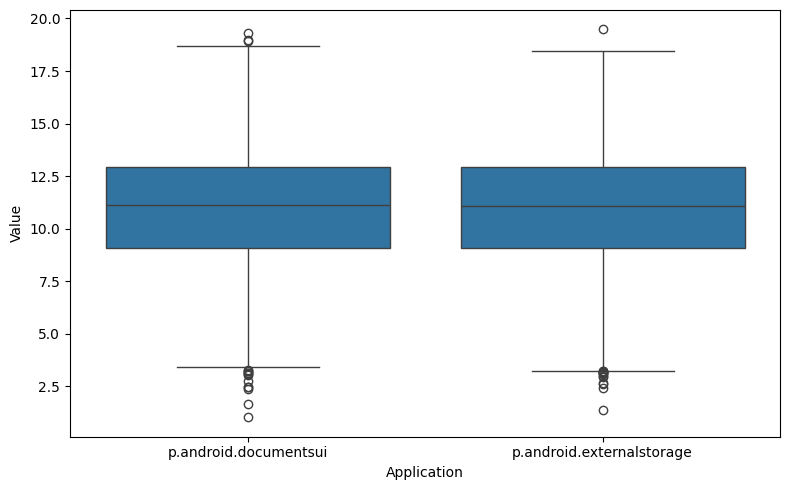

In [138]:
filtered_data = processes[processes['mwra'] == 1]

melted_data = pd.melt(filtered_data, value_vars=['p.android.documentsui', 'p.android.externalstorage'], 
                      var_name='Application', value_name='Value')

plt.figure(figsize=(8, 5))
sns.boxplot(data=melted_data, x='Application', y='Value')

plt.tight_layout()
plt.show()

Na základe vizualizácie sa zdá, že v stĺpcoch nie je rozdiel, ale môže to byť skreslené početnými vychýlenými hodnotami.

In [139]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [140]:
storage_out = identify_outliers(storage)
storage = storage.drop(storage_out.index)

documents_out = identify_outliers(documents)
documents = documents.drop(documents_out.index)

Týmto kódom sme identifikovali a následne odstránili z našich vzoriek odľahlé hodnoty.

#### Kontrola normality dát

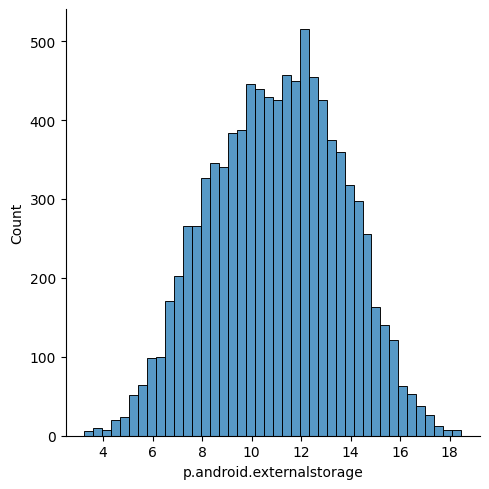

In [141]:
sns.displot(storage)

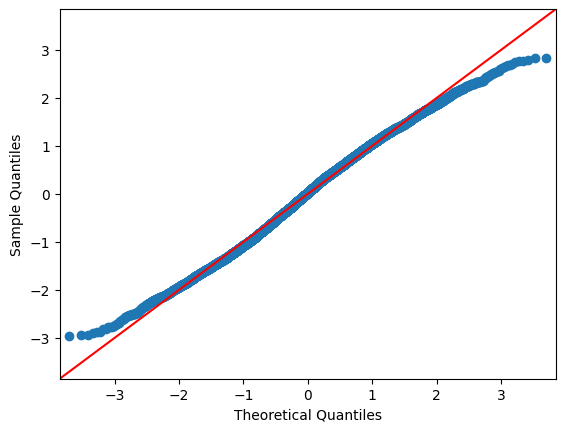

In [142]:
_ = sm.ProbPlot(storage, fit=True).qqplot(line='45')

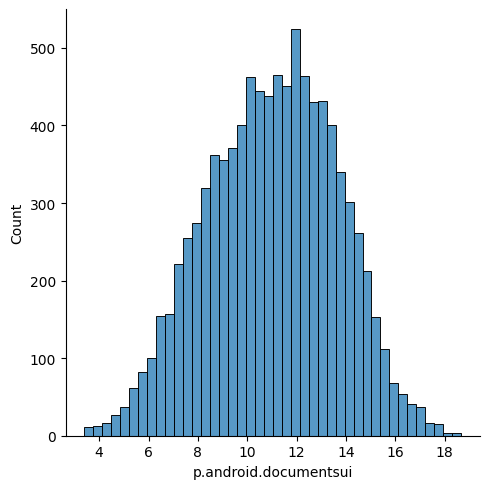

In [143]:
sns.displot(documents)

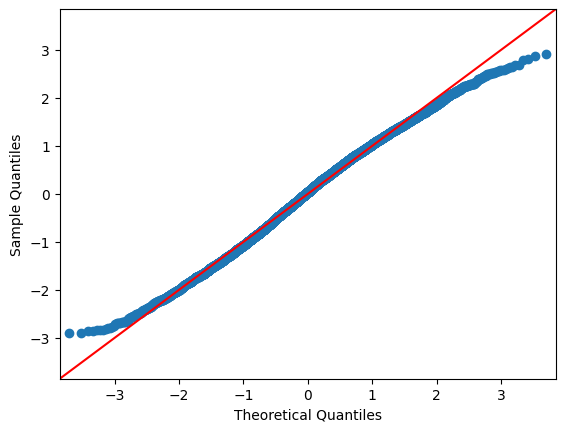

In [144]:
_ = sm.ProbPlot(documents, fit=True).qqplot(line='45')

##### Shapiro-Wilk test

**$H_0$ (nulová hypotéza)**: Dáta **pochádzajú** z normálneho rozdelenia.

**$H_1$ (alternatívna hypotéza)**: Dáta **nepochádzajú** z normálneho rozdelenia.

ShapiroResult(statistic=np.float64(0.9950347259796856), pvalue=np.float64(1.9515099621385092e-17))
Non-Normal distribution (reject H0)


/Users/peterbrenkus/Desktop/skola/sem5/IAU/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9348.
  res = hypotest_fun_out(*samples, **kwds)


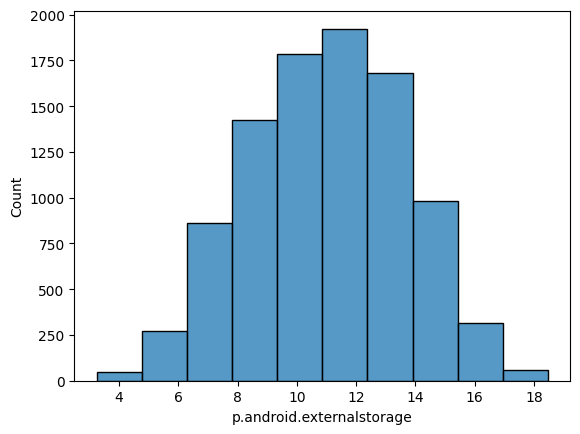

In [145]:
sns.histplot(storage, bins=10)

shapiro_test = shapiro(storage)
print(shapiro_test)

alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Non-Normal distribution (reject H0)')

ShapiroResult(statistic=np.float64(0.9955152880014047), pvalue=np.float64(1.9245050235340473e-16))
Non-Normal distribution (reject H0)


/Users/peterbrenkus/Desktop/skola/sem5/IAU/.venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9346.
  res = hypotest_fun_out(*samples, **kwds)


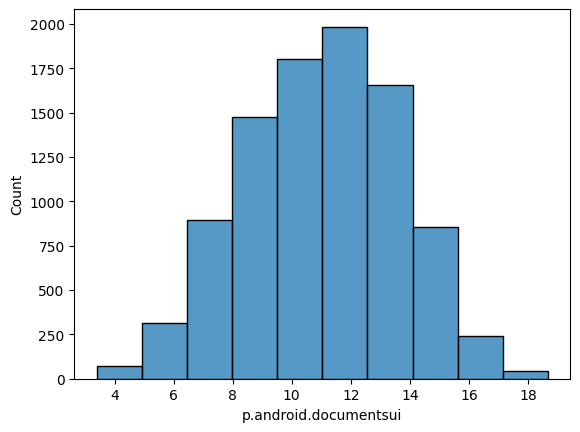

In [146]:
sns.histplot(documents, bins=10)

shapiro_test = shapiro(documents)
print(shapiro_test)

alpha = 0.05
if shapiro_test.pvalue > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Non-Normal distribution (reject H0)')

Výsledky z Shapiro-Wilk testu hlásia, že náš sample je väčší, než je prípustné pre stabilné výsledky. Napriek tomu sa výsledky Shapiro-Wilk testu a zobrazenia QQ-plotov zhodujú v tom, že ani jeden z atribútov nepochádza z normálneho rozdelenia, a preto nemôžeme použiť t-test. Namiesto toho musíme použiť neparametrickú verziu tohto testu, teda **Mann-Whitney U-test**.

##### Mann-Whitney U test

**$H_0$ (nulová hypotéza)**: Stĺpce c.android.youtube a c.android.chrome majú v priemere **rovnakú** hodnotu v stave malware-related-activity.

**$H_1$ (alternatívna hypotéza)**: Stĺpce c.android.youtube a c.android.chrome majú v priemere **odlišnú** hodnotu v stave malware-related-activity.

Statistics=43608183.500, p=0.839
Same distribution (fail to reject H0)


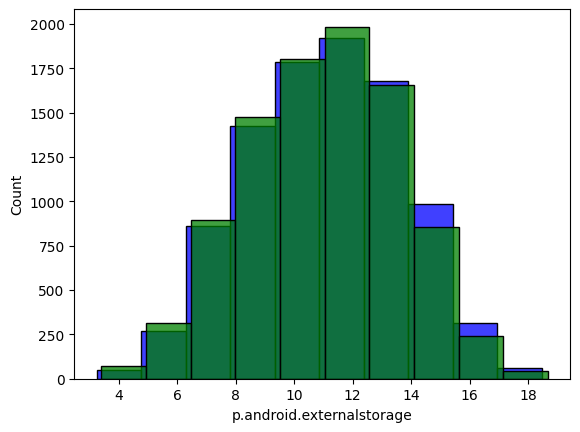

In [147]:
sns.histplot(storage, bins=10, color="blue")
sns.histplot(documents, bins=10, color="green")

stat, p = mannwhitneyu(storage, documents) 
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)') 
else:
    print('Different distribution (reject H0)')

Na základe vykonaného Mann-Whitney U testu môžeme vidieť, že nemáme dostatočné dôkazy o tom, že dáta nepochadzajú z rovnakej distribúcie, a teda nenašiel sa dostatok dôkazov na vyvrátenie nulovej hypotézy.

Stĺpce p.android.externalstorage a p.android.documentsui  majú v priemere **rovnakú** hodnotu v stave mwra = 1. Rozdiel medzi stĺpcami p.android.externalstorage a p.android.documentsui v stave mwra = 1 **nie je štatisticky signifikantný.**

## B
Overte či Vaše štatistické testy majú dostatok podpory z dát, teda či majú
dostatočne silnú štatistickú silu

Keďže naše distribúcie nie sú normálne, na výpočet Effect Size použijeme Rank-Biserial Correlation. Na odhadnutie štatistickej sily pre neparametrické testy, ako je Mann-Whiteney U-test nie je v knižniciach priamy spôsob tak ako na parametrické testy, použijeme teda Chi-square power analysis ako blízku náhradu. Chi-square test sa síce používa na kategorické dáta, ale takisto ako Mann-Whiteney U-test dáta delí na skupiny (ranky) a porovnáva rozdiely medzi týmito skupinami.

### Prvá hypotéza


In [148]:
stat, p = mannwhitneyu(chrome, youtube)
n1 = len(chrome)
n2 = len(youtube)

r = 1 - (2 * stat) / (n1 * n2)


alpha = 0.05
power_analysis = GofChisquarePower()
effect_size = abs(r)

power = power_analysis.solve_power(effect_size=effect_size, nobs=n1 + n2, alpha=alpha)
print(f'Effect size: {effect_size:.4f}')
print(f'Significance level: {alpha:.2f}')
print(f'Estimated power: {power:.4f}')
print(f'First sample size: {n1}')
print(f'Second sample size: {n2}')

Effect size: 0.4033
Significance level: 0.05
Estimated power: 1.0000
First sample size: 9219
Second sample size: 9342


Ako môžme vidieť, veľkosť efektu je stredná, to znamená že rozdiel medzi distribúciami je pozorovateľný, ale nie extrémny, čo môžme vidieť aj z grafu. Štatistická sila 100%, aj keď je len odhadovaná pomocou Chi-square power analysis, znamená že máme 100% šancu, že odhalíme rozdiel medzi distribúciami, ak existuje. Táto sila sa dá vysvetliť tým, že máme pomerne veľké samples a stredný Effect size.

### Druhá hypotéza

In [149]:
stat, p = mannwhitneyu(documents, storage)
n1 = len(storage)
n2 = len(documents)

r = 1 - (2 * stat) / (n1 * n2)


alpha = 0.05
power_analysis = GofChisquarePower()
effect_size = abs(r)

power = power_analysis.solve_power(effect_size=effect_size, nobs=n1 + n2, alpha=alpha)
print(f'Effect size: {effect_size:.4f}')
print(f'Significance level: {alpha:.2f}')
print(f'Estimated power: {power:.4f}')
print(f'First sample size: {n1}')
print(f'Second sample size: {n2}')

Effect size: 0.0017
Significance level: 0.05
Estimated power: 0.0563
First sample size: 9348
Second sample size: 9346


Ako môžme vidieť, Effect size je extrémne malý, čo znamená, že rozdiel medzi distribúciami je minimálny. Takýto malý Effect size spôsobuje aj malú štatistickú silu (iba 5%), napriek tomu že samples máme veľké, čo naznačuje, že s tak malým Effect size nám ani veľkosť samplov veľmi nepomôže. Keďže štatistická sila tohto testu je veľmi malá, tak je veľká šanca, že tento test urobí Type II Error, čiže neodmietne nulovú hypotézu, ak nie je pravdivá. Treba však znovu poznamenať, že štatistickú silu sme len odhadli pomocou Chi-square power analysis, keďže pre Mann-Whiteney U-test výpočet štatistickej sily nemáme.

# Záver

V tejto fáze projektu sme sa venovali spracovaniu dát z rôznych datasetov, v ktorých sme hľadali závislosti, korelácie a deskriptívne štatistiky. Okrem toho sme tiež identifikovali problémy v dátach, ako napríklad zlé formátovanie, prítomnosť chýbajúcich či odľahlých hodnôt a duplicitné záznamy. Po prvotnom čistení dát sme vykonali testovanie hypotéz, kde sme otestovali 2 nami vytvorené hypotézy. Pri tomto testovaní sme overili aj to, či majú dáta normálne rozdelenie, pričom sme zistili, že mnohé atribúty toto rozdelenie nevykazujú, čo nám potvrdili výsledky Shapiro-Wilk testu a QQ-ploty. Preto sme namiesto parametricých testov použili neparametrický Mann-Whitney U-test.

V našich dátach sme tiež identifikovali početné vychýlené hodnoty, ktoré sme následne odstránili, prípadne inak nahradili. Párová analýza odhalila závislosti medzi dvojicami atribútov, pričom sme identifikovali niekoľko silných korelácií medzi premennými, napríklad medzi premennými c.android.chrome a c.katana (negatívna korelácia), a medzi p.android.documentsui a p.android.chrome (pozitívna korelácia).

Na základe tejto analýzy môžeme potvrdiť, že niektoré premenné súvisia s predikovanou premennou mwra, pričom konkrétne hodnoty ako c.android.chrome boli výrazne vyššie pri mwra = 1, zatiaľ čo hodnoty ako p.android.packageinstaller boli nižšie pri tejto hodnote.

Celková analýza priniesla množstvo zaujímavých poznatkov o závislostiach medzi atribútmi, ktoré budú užitočné pre ďalšiu predikciu a prácu v ďalších fázach zadania.